# Introduction


* This airline satisfaction dataset from [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?select=airline_passenger_satisfaction.csv) is used to study the airline satisfaction of the passengers. 
* The satisfaction result will mostly be based on the quality airline services and the preferences of passengers. The descriptions of each feature in the dataset are as shown in the table below [reference](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?select=data_dictionary.csv)

|No| Field | Description |
|:-:| :-- | :-- |
|1| **ID** | Unique passenger identifier |
|2| **Gender** | Gender of the passenger (Female/Male) |
|3| **Age** | Age of the passenger |
|4| **Customer Type** | Type of airline customer (First-time/Returning) |
|5| **Type of Travel** | Purpose of the flight (Business/Personal) |
|6| **Class** | Travel class in the airplane for the passenger seat (Business/Economy/Economy Plus) |
|7| **Flight Distance** | Flight distance in miles |
|8| **Departure Delay** | Flight departure delay in minutes |
|9| **Arrival Delay** | Flight arrival delay in minutes |
|10| **Departure and Arrival Time Convenience** | Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|11| **Ease of Online Booking** | Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|12| **Check-in Service** | Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|13| **Online Boarding** | Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|14| **Gate Location** | Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|15| **On-board Service** | Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|16| **Seat Comfort** | Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|17| **Leg Room Service** | Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|18| **Cleanliness** | Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|19| **Food and Drink** | Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|20| **In-flight Service** | Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|21| **In-flight Wifi Service** | Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|22| **In-flight Entertainment** | Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|23| **Baggage Handling** | Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) <br> 0 means "not applicable" |
|24| **Satisfaction (*Target_variable*)** | Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied) |

# Objective
1. __Ultimate Goal:__ The airline wants to improve the customers' satisfaction with minimum effort/money spent
2. To find out which flight-services contribute the most in predicting satisfaction 
3. To find out which flight-services contribute the least in predicting satisfaction 
4. To find the top k flight-services that contribute the most in customers' satisfaction and its corresponding latent features 

# Hypothesis
* __(Why Obj 2 needed to achieve Obj 1)__ if the feature that contributes the most is related to flight services, 
    - then the airline can make improvement from there to increase the flight services
* __(Why Obj 3 needed to achieve Obj 1)__ if the feature that contributes the least is related to flight services, 
    - then the airline can continue with their usual servivces as before and there is no need pay more money/effort in improving it
* __(Why Obj 4 needed to achieve Obj 1)__ Since it is not possible to include all features that contribute in predicting the satisfaction of a customer (E.g. The Cleanliness of toilet in flight, the comfort on the temperature of air-condition,...)
    - thus, by identifying the latent variables, we may figure out some other important features that need improvement
<br><br>
* Intuitively, we can divide the variables into 6 different categories:
    - __(4) variables__ are About customer's personal information (gender, age, customer type, type of travel)
    - __(2) variables__ are About Flight type (class, flight distance)
    - __(3) variables__ are About the flight punctuality (departure delay, arrival delay, departure and arrival time convenience)
    - __(7) variables__ are About In-flight services (Cleanliness, Food and Drink, Seat Comfort, Leg Room Service, In-flight Service, In-flight Wifi Service, In-flight Entertainment)
    - __(5) variables__
    are About Other flight services (Check-in Service, Online Boarding, Ease of Online Booking, On-board Service, Baggage Handling)
    - __(1) variable__ is miscellaneous (Gate Location)
<br><br>
* Upon first glance, all the __(4+2+3+1=10)__ variables except variables about __'In-flight services'__, __'Other-flight services'__ seem to be useless in improving/predicting the customers' satisfaction (gender, age, customer type, type of travel, class, flight distance, departure delay, arrival delay, departure and arrival time convenience, gate location)
* We will do further feature selection after data preprocessing and data analysis.


# Import all required library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import os 
import seaborn as sns

from plotly import express as px
from plotly import graph_objs as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, Perceptron
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer.rotator import ORTHOGONAL_ROTATIONS, OBLIQUE_ROTATIONS

from scipy import stats 

from IPython.display import display, HTML
def show_df(df):
    display(HTML(df.to_html().replace("\\n","<br>")))   # Use the line-break (br) tag of html to handle each shrinked text in pd.Dataframe 
    
np.random.seed(0) # Fixed the result for all run

# Basic Data Pre-processing

## Load the dataset and view the data

In [9]:
df = pd.read_csv("airline_passenger_satisfaction.csv")
df.head(4)

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0  ...                 3             5                 2            5   
1  ...                 5             4                 5            5   
2  ...                 3             5                 3            5   
3  ...                 5             5                 5            4   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  

[4 rows x 24 columns]

## Remove unnecessary variable - id

In [10]:
# Drop the id
df = df.iloc[:,df.columns!="ID"]
df.head(5)

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  ...  On-board Service  Seat Comfort  \
0                       3  ...                 3             5   
1                       2  ...                 5             4   
2                       4  ...                 3             5   
3                       2  ...                 5             5   
4                       3  ...                 3             4   

   Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0                 2            5               5                  5   
1                 5            5               3                  5   
2                 3            5               5                  3   
3                 5            4               4                  5   
4                 4            5               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   
1                       2                        5                 5   
2                       4                        3                 3   
3                       2                        5                 5   
4                       3                        3                 3   

              Satisfaction  
0  Neutral or Dissatisfied  
1                Satisfied  
2                Satisfied  
3                Satisfied  
4                Satisfied  

[5 rows x 23 columns]

## Deal with the NULL value

In [11]:
print("The dataset contain NULL value?", df.isnull().any().any())
print("The dimension of the dataset  :", df.shape)

The dataset contain NULL value? True
The dimension of the dataset  : (129880, 23)


In [12]:
col_miss = [(col,df[col].isnull().sum()) for col in df.columns if df[col].isnull().sum() > 0]
print("The columns with missing value and the number of missing value:", col_miss)

The columns with missing value and the number of missing value: [('Arrival Delay', 393)]


In [13]:
saved_mean = []
for col,_ in col_miss:
    mean = df[col].mean()
    
    df.loc[:,col].fillna(mean, inplace=True)
    saved_mean.append(mean)

In [14]:
print("The dataset contain NULL value?", df.isnull().any().any())

The dataset contain NULL value? False


# Descriptive Statistic

## Basic Analysis
<a id = "OUT_8"></a>

In [15]:
df.describe().T

count         mean         std  \
Age                                     129880.0    39.427957   15.119360   
Flight Distance                         129880.0  1190.316392  997.452477   
Departure Delay                         129880.0    14.713713   38.071126   
Arrival Delay                           129880.0    15.091129   38.407410   
Departure and Arrival Time Convenience  129880.0     3.057599    1.526741   
Ease of Online Booking                  129880.0     2.756876    1.401740   
Check-in Service                        129880.0     3.306267    1.266185   
Online Boarding                         129880.0     3.252633    1.350719   
Gate Location                           129880.0     2.976925    1.278520   
On-board Service                        129880.0     3.383023    1.287099   
Seat Comfort                            129880.0     3.441361    1.319289   
Leg Room Service                        129880.0     3.350878    1.316252   
Cleanliness                             129880.0     3.286326    1.313682   
Food and Drink                          129880.0     3.204774    1.329933   
In-flight Service                       129880.0     3.642193    1.176669   
In-flight Wifi Service                  129880.0     2.728696    1.329340   
In-flight Entertainment                 129880.0     3.358077    1.334049   
Baggage Handling                        129880.0     3.632114    1.180025   

                                         min    25%    50%     75%     max  
Age                                      7.0   27.0   40.0    51.0    85.0  
Flight Distance                         31.0  414.0  844.0  1744.0  4983.0  
Departure Delay                          0.0    0.0    0.0    12.0  1592.0  
Arrival Delay                            0.0    0.0    0.0    13.0  1584.0  
Departure and Arrival Time Convenience   0.0    2.0    3.0     4.0     5.0  
Ease of Online Booking                   0.0    2.0    3.0     4.0     5.0  
Check-in Service                         0.0    3.0    3.0     4.0     5.0  
Online Boarding                          0.0    2.0    3.0     4.0     5.0  
Gate Location                            0.0    2.0    3.0     4.0     5.0  
On-board Service                         0.0    2.0    4.0     4.0     5.0  
Seat Comfort                             0.0    2.0    4.0     5.0     5.0  
Leg Room Service                         0.0    2.0    4.0     4.0     5.0  
Cleanliness                              0.0    2.0    3.0     4.0     5.0  
Food and Drink                           0.0    2.0    3.0     4.0     5.0  
In-flight Service                        0.0    3.0    4.0     5.0     5.0  
In-flight Wifi Service                   0.0    2.0    3.0     4.0     5.0  
In-flight Entertainment                  0.0    2.0    4.0     4.0     5.0  
Baggage Handling                         1.0    3.0    4.0     5.0     5.0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

<a id = "OUT_10"></a>

In [17]:
df['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

## Get the categorical and numerical columns name

In [18]:
numerical = [x for x in df.columns if len(df[x].unique()) > 6]    # define categorical variables (columns)
categorical = list(set(df.columns) - set(numerical))  # define numerical variables (columns)

print(f"{len(numerical)} Numerical variables (columns) are: {np.sort(numerical)}\n")
print(f"{len(categorical)} Categorical variables (columns) are: {np.sort(categorical)}")

4 Numerical variables (columns) are: ['Age' 'Arrival Delay' 'Departure Delay' 'Flight Distance']

19 Categorical variables (columns) are: ['Baggage Handling' 'Check-in Service' 'Class' 'Cleanliness'
 'Customer Type' 'Departure and Arrival Time Convenience'
 'Ease of Online Booking' 'Food and Drink' 'Gate Location' 'Gender'
 'In-flight Entertainment' 'In-flight Service' 'In-flight Wifi Service'
 'Leg Room Service' 'On-board Service' 'Online Boarding' 'Satisfaction'
 'Seat Comfort' 'Type of Travel']


## Find all unique value for each class

In [19]:
data = []
for col in df.columns:
    unique_value = np.unique(df[col]).tolist()
    temp_str = ""
    data.append([col, len(unique_value), ",".join(str(value) for value in unique_value ) ])
df_temp = pd.DataFrame(data, columns=["Columns Name", "Num of unique value", "Unique Value"])
pd.options.display.max_colwidth = 70
df_temp

Columns Name  Num of unique value  \
0                                   Gender                    2   
1                                      Age                   75   
2                            Customer Type                    2   
3                           Type of Travel                    2   
4                                    Class                    3   
5                          Flight Distance                 3821   
6                          Departure Delay                  466   
7                            Arrival Delay                  473   
8   Departure and Arrival Time Convenience                    6   
9                   Ease of Online Booking                    6   
10                        Check-in Service                    6   
11                         Online Boarding                    6   
12                           Gate Location                    6   
13                        On-board Service                    6   
14                            Seat Comfort                    6   
15                        Leg Room Service                    6   
16                             Cleanliness                    6   
17                          Food and Drink                    6   
18                       In-flight Service                    6   
19                  In-flight Wifi Service                    6   
20                 In-flight Entertainment                    6   
21                        Baggage Handling                    5   
22                            Satisfaction                    2   

                                                             Unique Value  
0                                                             Female,Male  
1   7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...  
2                                                    First-time,Returning  
3                                                       Business,Personal  
4                                           Business,Economy,Economy Plus  
5   31,56,67,73,74,76,77,78,80,82,83,84,86,89,90,95,96,98,100,101,102,...  
6   0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,2...  
7   0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,1...  
8                                                             0,1,2,3,4,5  
9                                                             0,1,2,3,4,5  
10                                                            0,1,2,3,4,5  
11                                                            0,1,2,3,4,5  
12                                                            0,1,2,3,4,5  
13                                                            0,1,2,3,4,5  
14                                                            0,1,2,3,4,5  
15                                                            0,1,2,3,4,5  
16                                                            0,1,2,3,4,5  
17                                                            0,1,2,3,4,5  
18                                                            0,1,2,3,4,5  
19                                                            0,1,2,3,4,5  
20                                                            0,1,2,3,4,5  
21                                                              1,2,3,4,5  
22                                      Neutral or Dissatisfied,Satisfied

## Boxplot for numerical variable
* The information that can get from boxplot is as below:
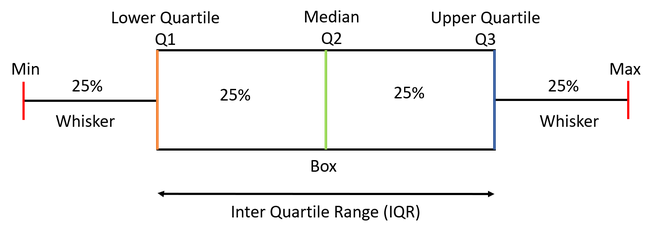
<p style="text-align:center"> <a href="https://www.geeksforgeeks.org/box-plot/">Image Sources</a> </p>
* where the value that are out of the fences of the boxplot are considered as extreme outliers.
* The actual value for the mean and Q1, Q3 can be obtain at [Out[8]](#OUT_8) 

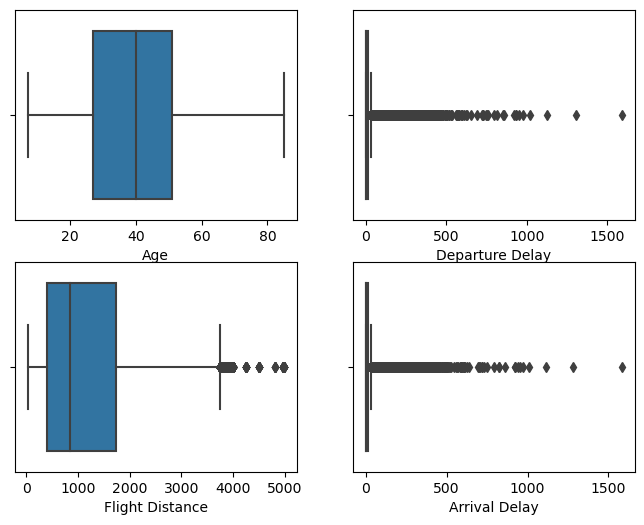

In [20]:
### TOO LAG but it is an interactive graph
# n_cols = 4
# n_rows = int(np.ceil(len(numerical) / n_cols))

# """ Boxplot using plotly.graph_objs """
# fig = make_subplots(rows=n_rows, cols=n_cols)
# for i, col in enumerate(numerical):
#     fig.add_trace(go.Box(name=col, y=df[col]), 
#                  row=i//n_cols + 1,
#                  col=i%n_cols + 1)
# fig.update_layout(title="Box plot of numerical columns",
#                  height=800,
#                  width=1200)
# fig.show()

_, ax = plt.subplots(2, 2, figsize=(8, 6))

for i, feature in enumerate(numerical):
    sns.boxplot(data=df, x=feature, ax = ax[i%2, i//2])      


### Interpretation of the boxplot
* From the figure above, there are many outliers in "Flight distance","Departure Delay" and "Arrival Delay"
* If they are extreme outliers, this could make our dataset and classification inaccurate.
* Therefore, we could decide to remove these extreme outliers and replace it with a new value using preprocessing techniques such as quantile transformation.
* Besides that, we can also observe that the overall data distribution of "Flight distance","Departure Delay" and "Arrival Delay" are heavily  left skewed. 
* We will do futher analysis of the skewness of data by ploting the kernel density function (kde)

## Kernel Density Estimate for numerical variable

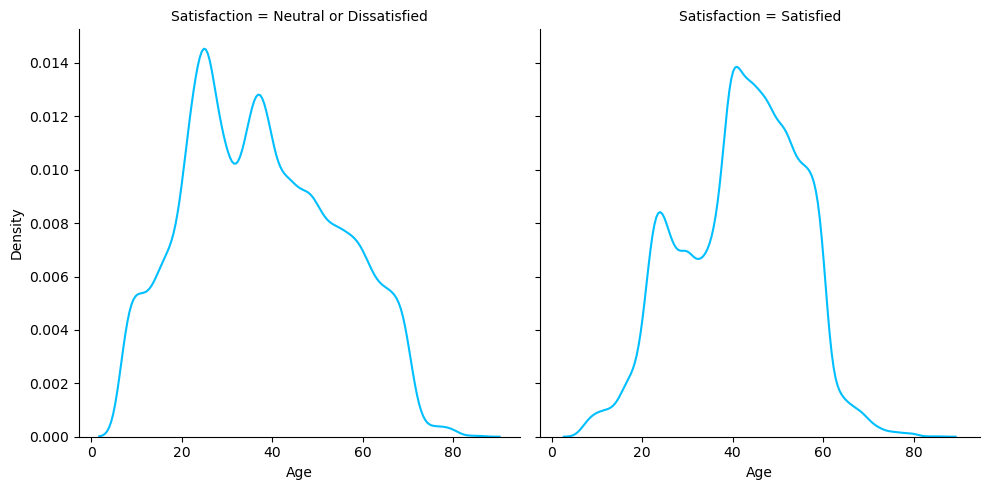

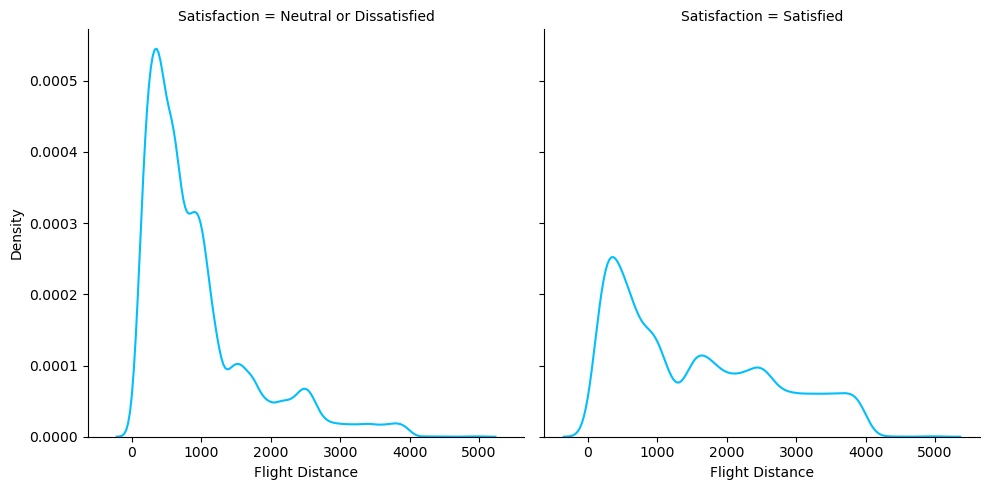

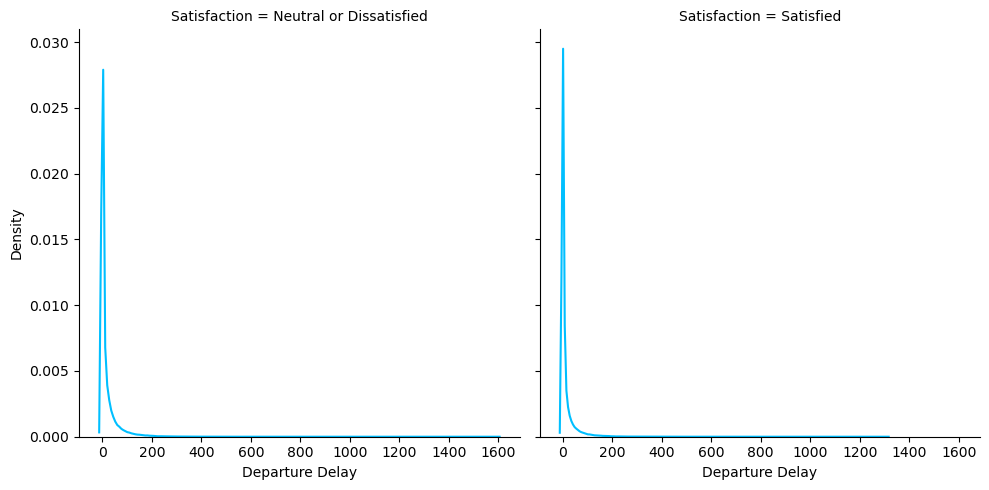

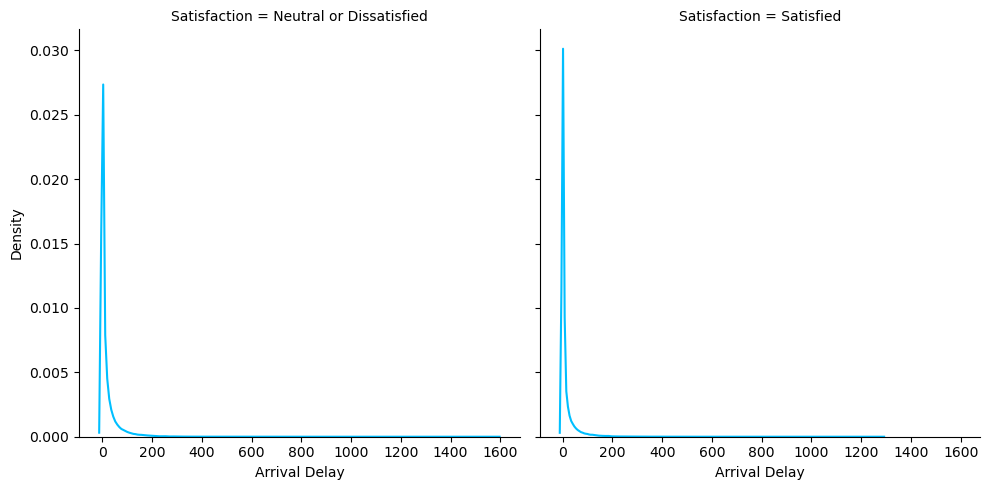

In [21]:
for feature in numerical: # KDE distribution of numerical feature
    sns.displot(x = feature,col='Satisfaction',data = df, kind="kde" ,color = 'deepskyblue')

* From the kde graph we can see that "Age" column seems to have symmetric distribution while the "Flight distance", Departure delay" and  "Arrival delay" are highly skewed. 
* We can use df.skew() to see calculate the skewness of the distribution

In [22]:


"""Calculating the skewness of the numerical columns to show evidence of the assumption we made"""
df_skew = pd.DataFrame(df[numerical].skew())
df_skew.columns = ['skewness']

# |skew| > 0.50 is considered as moderately skewed, |skew| > 1.0 is considered as highly skewed
df_skew["too_skewed"] = abs(df_skew["skewness"]) > 0.50 
df_skew

skewness  too_skewed
Age             -0.003606       False
Flight Distance  1.108142        True
Departure Delay  6.821980        True
Arrival Delay    6.680239        True

### Interpretation of Kernel Density Estimate (kde)
* As we can see, the numerical columns except "Age" are highly skewed because they have |skewness| > 0.5. 
* Therefore, we can apply a tranformation technique known as the "Quantile Transformation" to transform these columns to have a Gaussian probability distribution. 

## Histogram and Bivariate bar plot for categorical variables

In [23]:
def bivariate_bar_plot(n_cols, columns, figsize=(20,8)):
    n_rows = int(np.ceil(len(columns) / n_cols))
    _, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = figsize)
    plt.suptitle('Satisfaction by categorical features')

    for i, col in enumerate(columns):
        x = sns.countplot(data=df[categorical], x=col, hue='Satisfaction', palette = ['deepskyblue','crimson'], ax=ax[i//n_cols, i%n_cols])
        for z in x.patches:
          x.annotate('{:.1f}'.format((z.get_height()/df[categorical].shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

In [24]:
n_cols = 3
n_rows = 2

"""Histogram using plotly"""
fig = make_subplots(rows=n_rows, cols=n_cols,
                    subplot_titles=tuple(df.select_dtypes('object').columns))
for i, col in enumerate(df.select_dtypes('object').columns):
    counts = df[col].value_counts()
    fig.add_trace(go.Bar(name=col, x=counts.index, y=counts.values), 
                  row=i//n_cols + 1,
                  col=i%n_cols + 1)

fig.update_layout(title="Histogram plot of categorical columns",
                 height=500,
                 width=800,
                 showlegend=False)

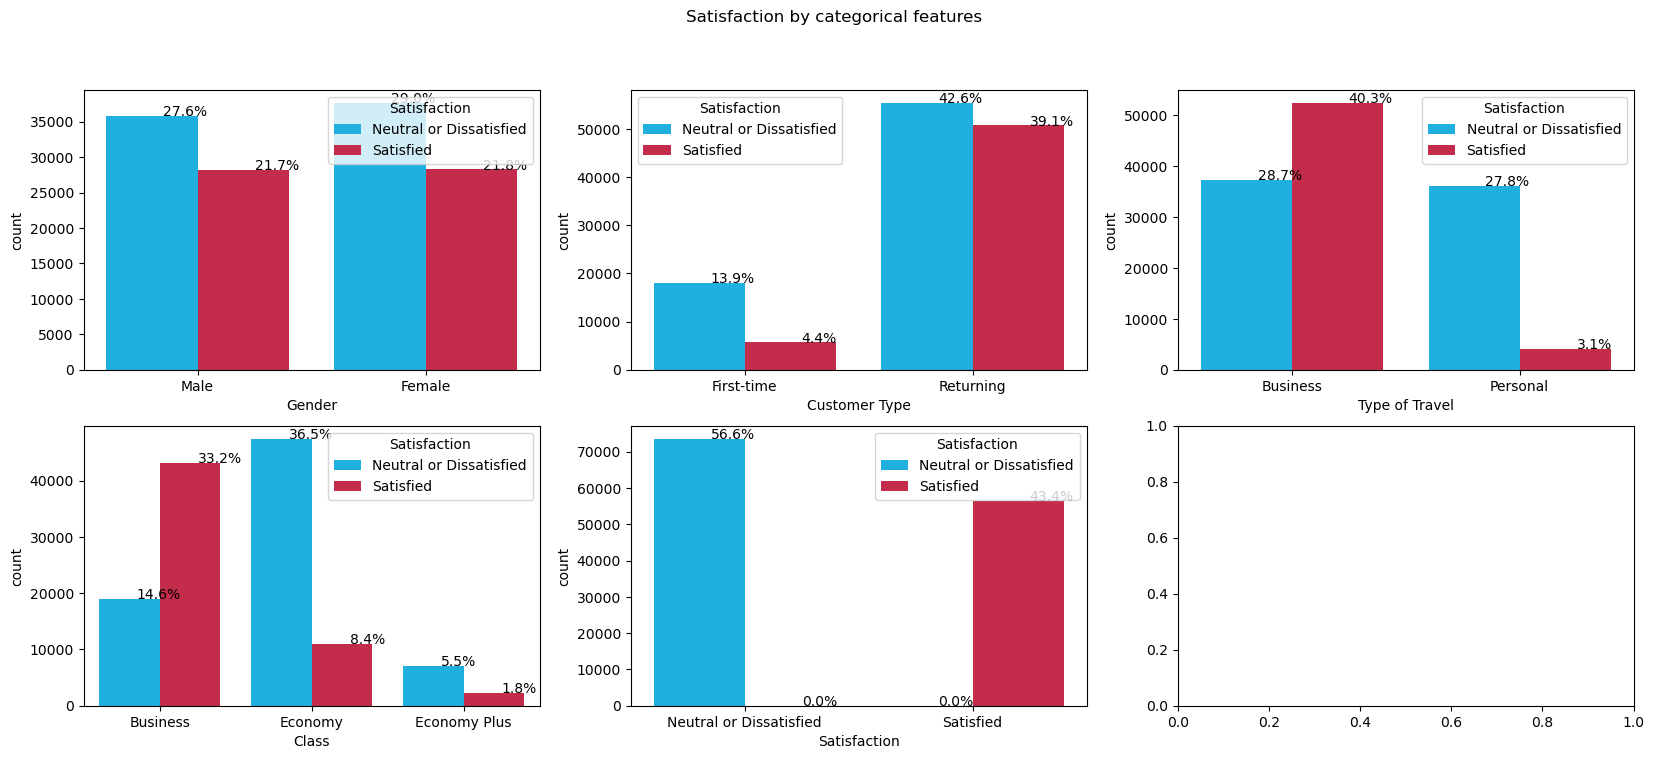

In [25]:
bivariate_bar_plot(3, df.select_dtypes('object').columns)

In [26]:
scale_1_to_5 = categorical.copy()
for col in df.select_dtypes('object').columns:
    scale_1_to_5.remove(col)
print(scale_1_to_5)

['Departure and Arrival Time Convenience', 'Leg Room Service', 'Seat Comfort', 'In-flight Service', 'Gate Location', 'In-flight Wifi Service', 'Check-in Service', 'Baggage Handling', 'Food and Drink', 'In-flight Entertainment', 'Cleanliness', 'Online Boarding', 'On-board Service', 'Ease of Online Booking']


In [27]:
n_cols = 3
n_rows = n_rows = int(np.ceil(len(scale_1_to_5) / n_cols))

"""Histogram using plotly"""
fig = make_subplots(rows=n_rows, cols=n_cols,
                    subplot_titles=tuple(scale_1_to_5))

for i, col in enumerate(scale_1_to_5):
    counts = df[col].value_counts()
    fig.add_trace(go.Bar(name=col, x=counts.index, y=counts.values), 
                  row=i//n_cols + 1,
                  col=i%n_cols + 1)

fig.update_layout(title="Histogram plot of categorical columns",
                 height=800,
                 width=1000,
                 showlegend=False)

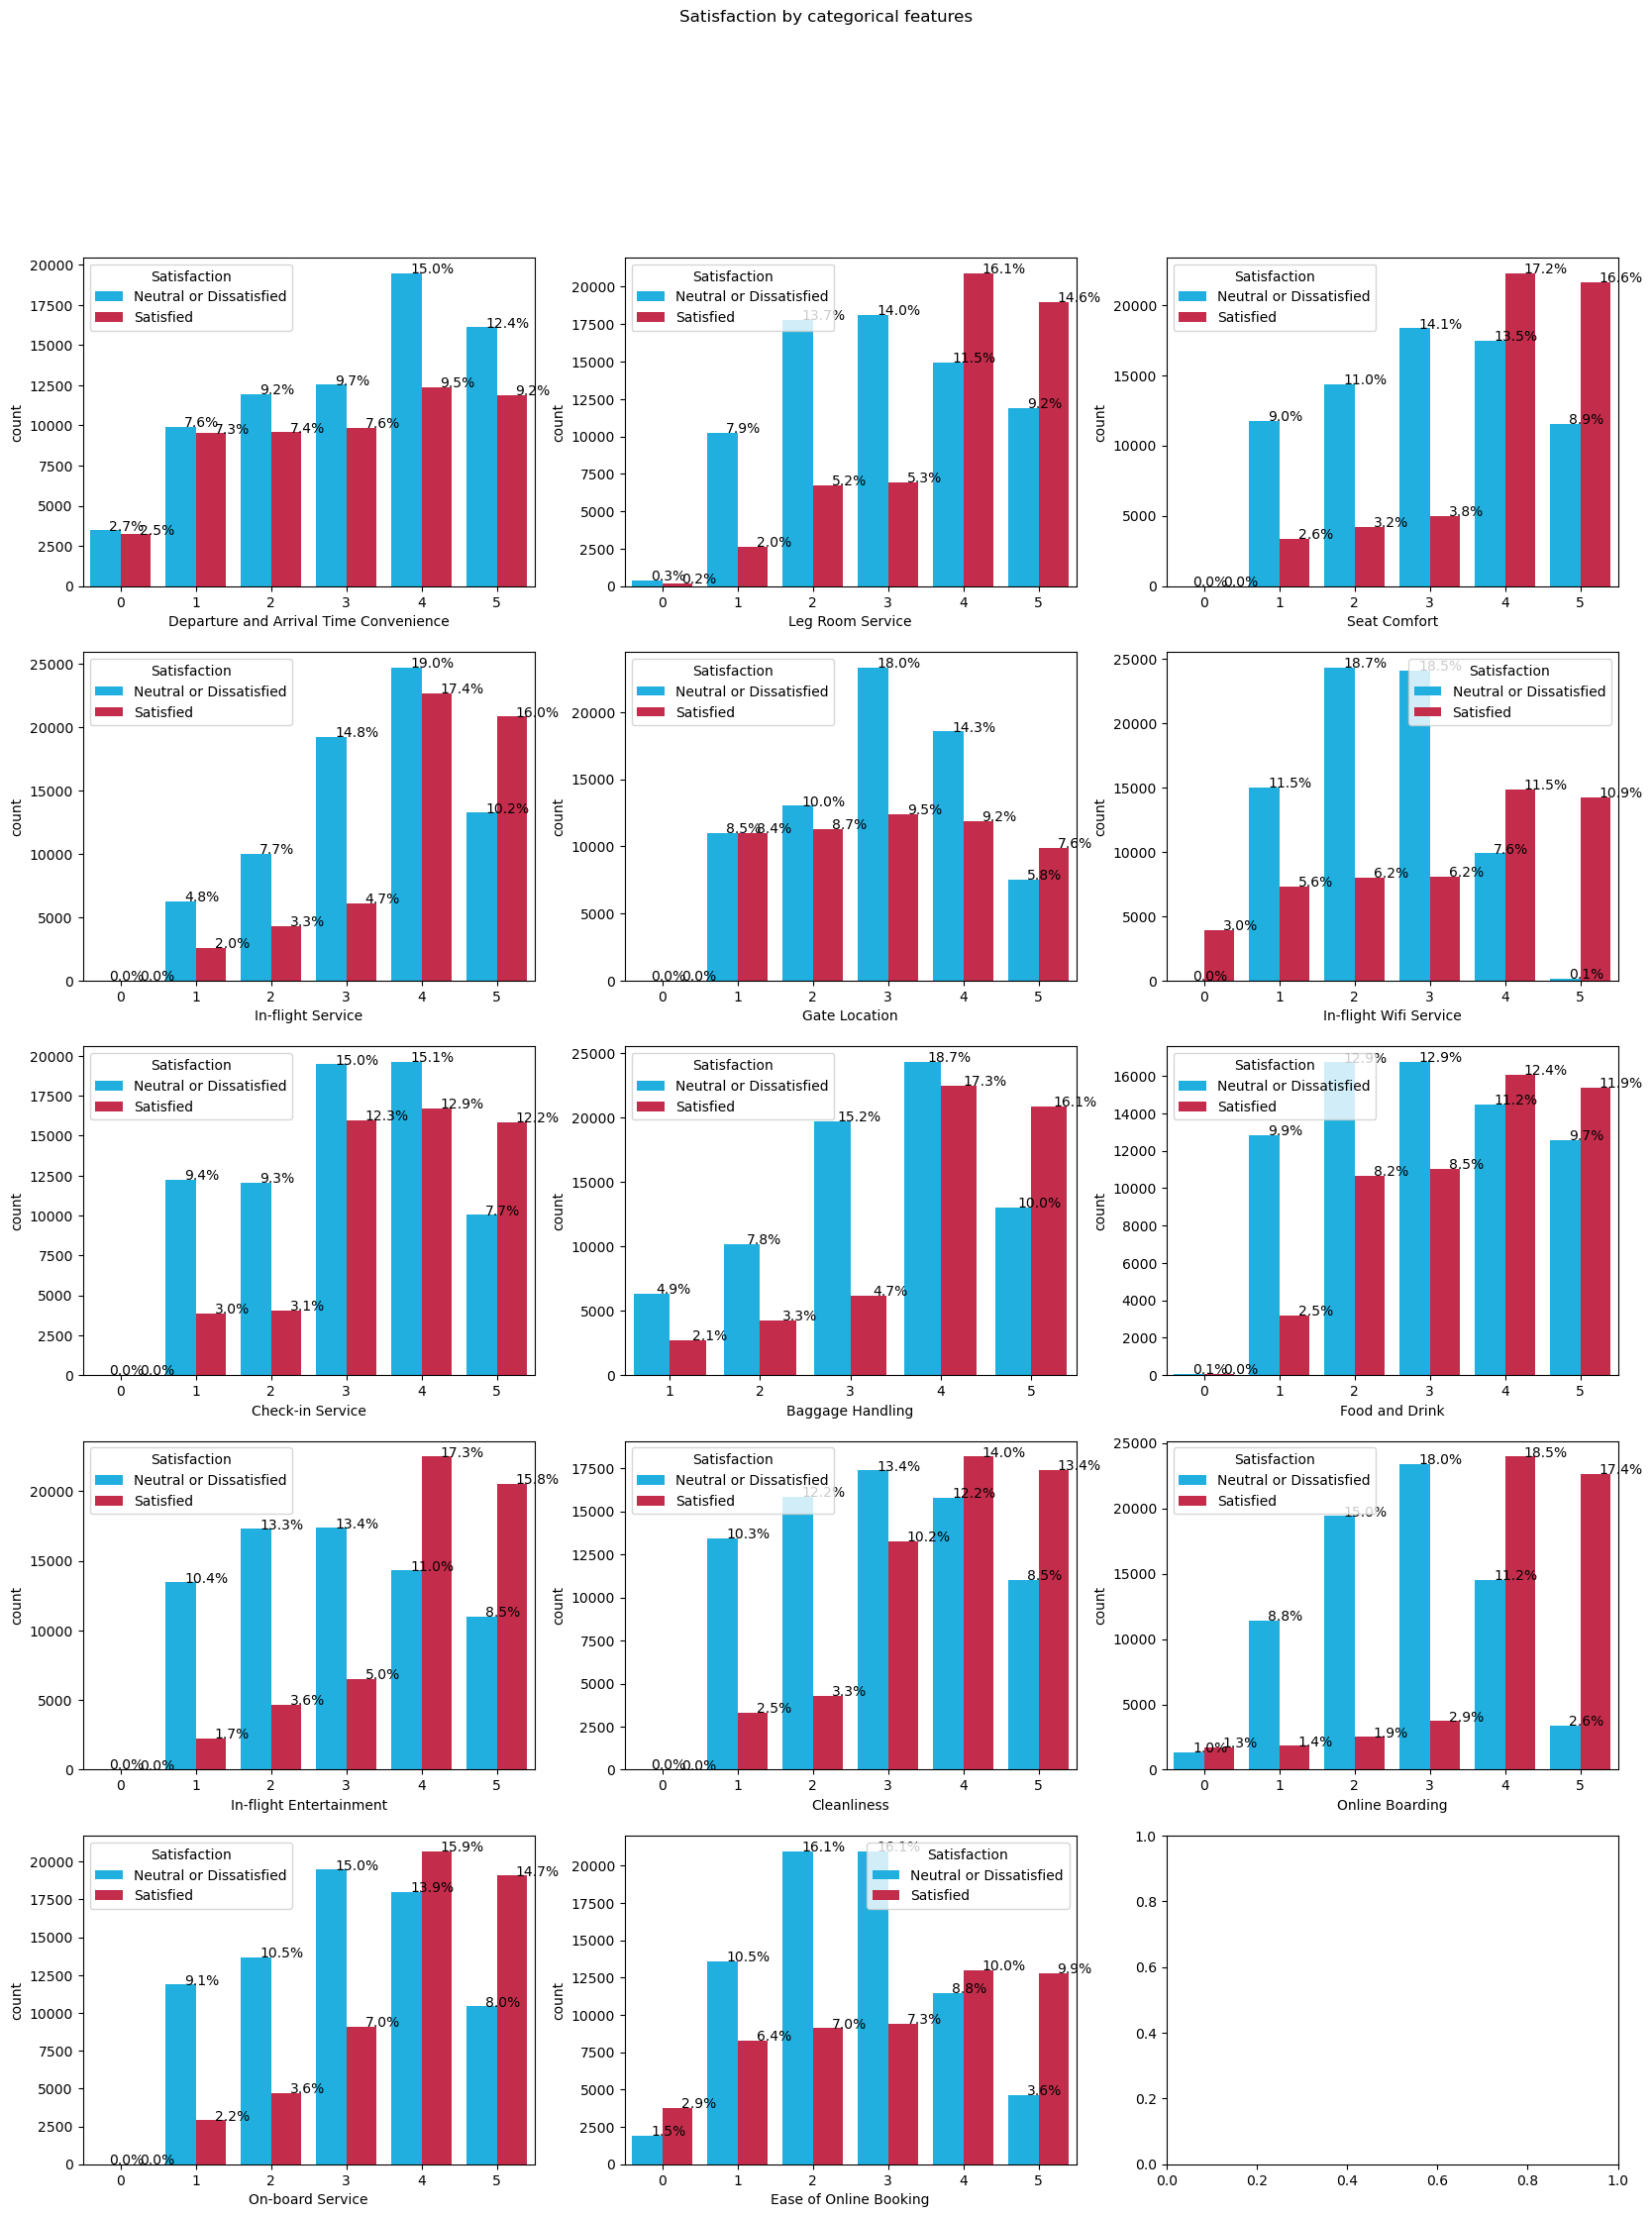

In [28]:
bivariate_bar_plot(3, scale_1_to_5, (20,25))

###  Interpretation of the bivariate bar plot
|Feature|Analysis|
| :--- | :--- |
|<b>Gender</b>|<li>There are almost an equal number of males and females in our dataset. Both males and females have almost equal percentages when it comes to the neutral or dissatisfied and satisfied customers.</li><li>Therefore, we can conclude that the variable gender most likely does not contribute in predicting satisfaction of a customer</li>|
<b>Customer type</b>|<li>More than 80% of the passengers are returning customers, and the difference in satisfaction seems to be relatively small.</li><li>Overall, people seemed to be more dissatisfied whether they were first-time or returning customers or not.</li>|
|<b>Type of travel</b>|<li>The difference between whether it is a personal or business trip seems to heavily influence on the satisfaction. </li><li> When it is a business trip, there seems to be a higher satisfaction as all the expenses is paid by the company</li>|
|<b>Class</b>|<li>People were satisfied when it came using business class. However, they became heavily biased to being neutral or dissatisfied in economy, and even in economy plus.</li><li>This could show that the treatment and service that they receive in business class is very different from economy and economy plus.</li>|
|<b>Satisfaction</b>|<li>Overally, more people are neutral or dissatisfied rather than satisfied, the actual value can be obtained from [Out[10]](#OUT_10)</li>|
|<b>All other features (Likert Scale)</b>|<li>Overall, we can see that if the customers are dissatisfied or neutral, they usually give ratings between 1-3</li><li> Customers who are satisfied usually give ratings from 4-5.</li><li> However, this trend doesn't show in "Departure and Arrival Time Convenience", where a majority of the customers are dissatisfied no matter the score being 1-5. But when observing the figures, we can see that the percentages are not that far apart.</li>|



## Convert the categorical variable to numerical

In [29]:
for col in df.select_dtypes('object').columns:
    unique_value = np.unique(df[col])
    df[col] = df[col].replace(unique_value, np.arange(len(unique_value)))
    print(f"{col:<16}: {unique_value} have been converted to {np.arange(len(unique_value))}")

Gender          : ['Female' 'Male'] have been converted to [0 1]
Customer Type   : ['First-time' 'Returning'] have been converted to [0 1]
Type of Travel  : ['Business' 'Personal'] have been converted to [0 1]
Class           : ['Business' 'Economy' 'Economy Plus'] have been converted to [0 1 2]
Satisfaction    : ['Neutral or Dissatisfied' 'Satisfied'] have been converted to [0 1]


## Correlation Heatmap

<Axes: >

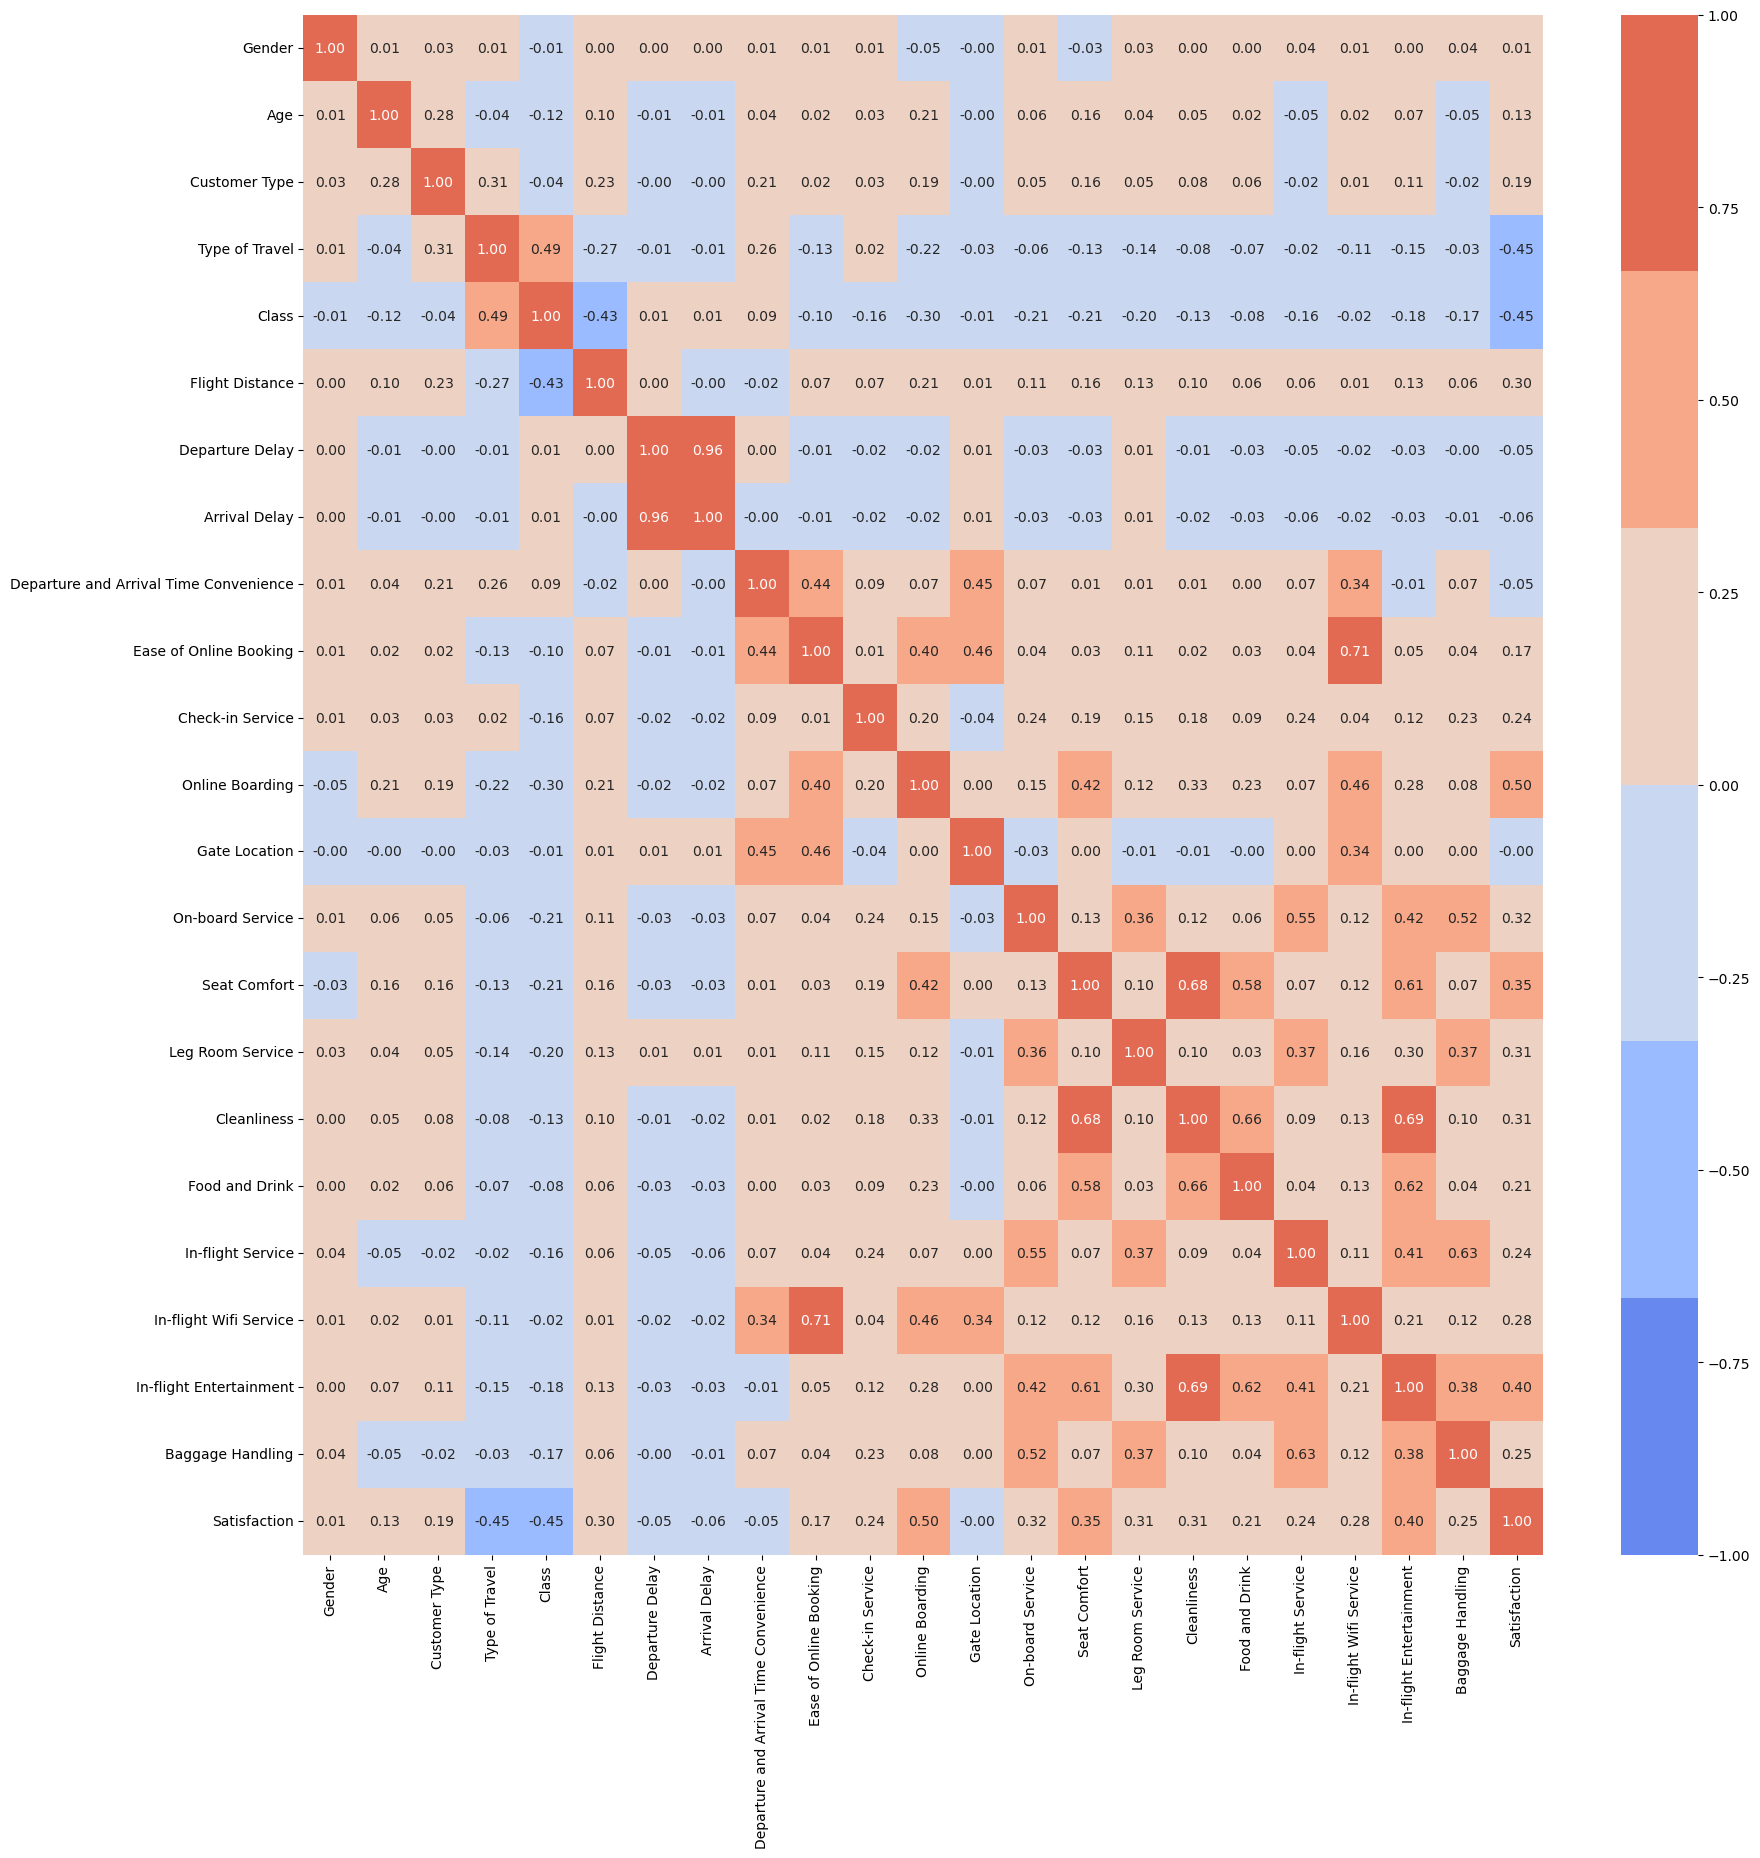

In [30]:
# Overall covariance matrix
fig, ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = sns.color_palette("coolwarm"), ax=ax)

In [31]:
# The correlation of each variable with the target variable (Satisfication)
fig = go.Figure()
corr_target = df.corr()["Satisfaction"]
fig.add_trace(go.Bar(x=corr_target.index, y=corr_target.values))
fig.update_layout(title="Correlation Histogram between features and target", 
                  xaxis_title='Features', yaxis_title='Correlation', barmode='group')
fig.show()

###  Interpretation of the correlation heatmap
|Features with high positive correlation ( > 0.6)|Possible reason|
|:--|:--|
|- Ease of online booking & In flight with Wifi service (0.71)| - |
|- In-flight entertainment & Food and Drink  (0.62) <br> - In-flight entertainment and Seat comfort (0.61) |Logically, since the customer cannot move anywhere in the flight for a long time, In-flight entertainment will be enjoyed when the seat is comfortable and when the food is appetizing|
|- Cleanliness & food and drink (0.66) <br> - Cleanliness & Seat comfort (0.68) <br> - Cleanliness & In-flight entertainment (0.69) |Cleanliness seems to have a lot of correlation with features that are during the flight (services provided during flight time). With this information, we can say that if the rating of the cleanliness is high, the rating of the services on flight will also be high. |
- Departure delay & arrival delay (0.96) |Logically, if a plane depart late by a certain amount of minutes, the plane will also arrive late by almost the same number of minutes.|

* There is no such pair of feature with high negative correlated (< 0.6)
* There are no features that have high positive/negative correlation with the target variable (satisfication)
* Therefore, the relationship between the features and target variable is likely to be non-linear

# Futher pre-process the data after analysis

##  Quantile Transformation to remove extreme outliers

* Quantile transformation is a technique used to transform numerical input or output variables to have a standard normal distribution ~ N(0,1) or uniform probability distribution. 
* The transformation involves ranking the data in ascending order and replacing each value with its corresponding quantile from a standard normal distribution. 
* The advantage of using quantile transformation 
  - help to reduce the impact of extreme outliers on the data
  - easier to apply statistical techniques that assume normality, such as regression analysis and hypothesis testing.

Reference: 
1. https://link.springer.com/article/10.1007/s10994-021-05960-5 
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/pdf/sap-26-02-105.pdf

In [32]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
df_qt = df.copy()
df_qt[["Flight Distance", "Departure Delay", "Arrival Delay"]] = qt.fit_transform(df[["Flight Distance", "Departure Delay", "Arrival Delay"]])

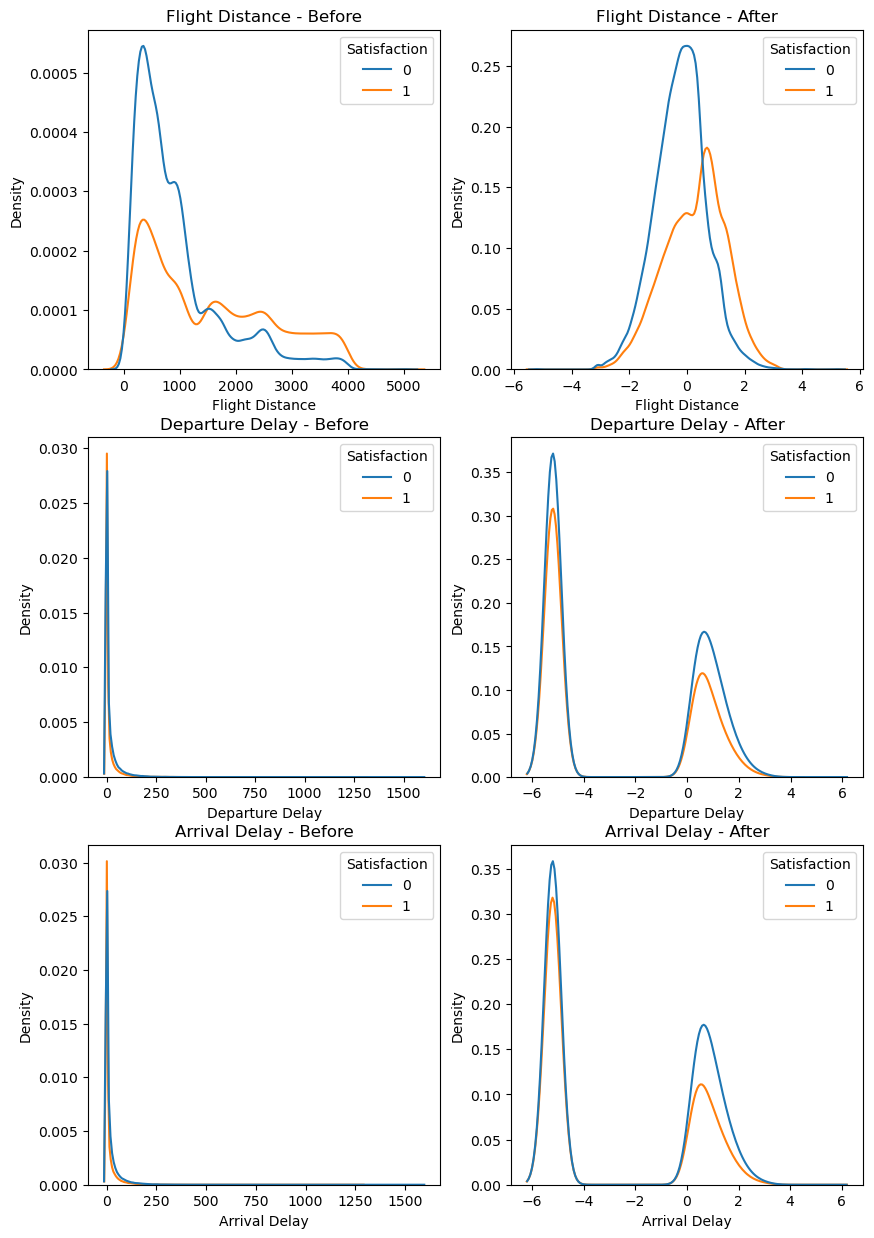

In [33]:
"""KDE distribution of numerical features"""
fig, ax = plt.subplots(3,2,figsize=(10,15))
for i,feature in enumerate(["Flight Distance", "Departure Delay", "Arrival Delay"]):
    sns.kdeplot(data = df   , x = feature, hue='Satisfaction',color = 'deepskyblue', ax=ax[i][0])
    sns.kdeplot(data = df_qt, x = feature, hue='Satisfaction',color = 'deepskyblue', ax=ax[i][1])
    ax[i][0].set_title(f"{feature} - Before")
    ax[i][1].set_title(f"{feature} - After")

In [34]:
df_skew = pd.DataFrame(df[numerical].skew())
df_skew.columns = ['skewness']

# |skew| > 0.50 is considered as moderately skewed, |skew| > 1.0 is considered as highly skewed
df_skew["too_skewed"] = abs(df_skew["skewness"]) > 0.50 
df_skew

skewness  too_skewed
Age             -0.003606       False
Flight Distance  1.108142        True
Departure Delay  6.821980        True
Arrival Delay    6.680239        True

In [35]:
df = df_qt.copy()
del df_qt

## Normalize the dataset

In [36]:
sc = MinMaxScaler()
columns_name = df.columns
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns = columns_name)
df

Gender       Age  Customer Type  Type of Travel  Class  \
0          1.0  0.525641            0.0             0.0    0.0   
1          0.0  0.358974            1.0             0.0    0.0   
2          1.0  0.435897            1.0             0.0    0.0   
3          1.0  0.551282            1.0             0.0    0.0   
4          0.0  0.538462            1.0             0.0    0.0   
...        ...       ...            ...             ...    ...   
129875     1.0  0.269231            1.0             1.0    1.0   
129876     1.0  0.435897            1.0             1.0    1.0   
129877     1.0  0.448718            1.0             1.0    1.0   
129878     1.0  0.551282            1.0             1.0    1.0   
129879     0.0  0.166667            1.0             1.0    1.0   

        Flight Distance  Departure Delay  Arrival Delay  \
0              0.497949         0.525386       0.535539   
1              0.497949         0.595966       0.615874   
2              0.501207         0.000000       0.000000   
3              0.573418         0.000000       0.000000   
4              0.664973         0.000000       0.516611   
...                 ...              ...            ...   
129875         0.442451         0.525386       0.526512   
129876         0.403237         0.000000       0.000000   
129877         0.412770         0.543951       0.566616   
129878         0.412770         0.604917       0.586867   
129879         0.412770         0.000000       0.000000   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
0                                          0.6                     0.6  ...   
1                                          0.4                     0.4  ...   
2                                          0.8                     0.8  ...   
3                                          0.4                     0.4  ...   
4                                          0.6                     0.6  ...   
...                                        ...                     ...  ...   
129875                                     0.8                     0.8  ...   
129876                                     1.0                     0.6  ...   
129877                                     1.0                     0.4  ...   
129878                                     0.8                     0.8  ...   
129879                                     0.2                     0.6  ...   

        On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                    0.6           1.0               0.4          1.0   
1                    1.0           0.8               1.0          1.0   
2                    0.6           1.0               0.6          1.0   
3                    1.0           1.0               1.0          0.8   
4                    0.6           0.8               0.8          1.0   
...                  ...           ...               ...          ...   
129875               1.0           0.2               0.8          0.8   
129876               1.0           0.4               1.0          0.4   
129877               0.6           0.6               0.8          0.6   
129878               0.8           0.8               1.0          0.6   
129879               0.8           0.4               0.8          0.4   

        Food and Drink  In-flight Service  In-flight Wifi Service  \
0                  1.0                1.0                     0.6   
1                  0.6                1.0                     0.4   
2                  1.0                0.6                     0.8   
3                  0.8                1.0                     0.4   
4                  0.8                0.6                     0.6   
...                ...                ...                     ...   
129875             0.8                1.0                     0.8   
129876             0.4                0.8                     0.6   
129877             0.6                0.8                  

## Split the dataset into training and testing

In [37]:
data = df.iloc[:,df.columns != "Satisfaction"]
label = df["Satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)
print(f"After spliting X_train shape: {X_train.shape} y_train shape: {y_train.shape}")
print(f"After spliting X_test  shape: {X_test.shape} y_test  shape: {y_test.shape}")

After spliting X_train shape: (90916, 22) y_train shape: (90916,)
After spliting X_test  shape: (38964, 22) y_test  shape: (38964,)


# Linear Discriminative Analysis
* Before ranking the features, we will first perform Linear Discriminative Analysis to analyze if there is sufficient information that exists in predicting customer's satisfaction.
* This is done by looking at the precision, recall and f1-score on the test dataset 

In [38]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
# print("The accuracy  on the test data:",accuracy_score(y_test,y_hat))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Confusion matrix:
 [[19921  2189]
 [ 2817 14037]]
              precision    recall  f1-score   support

         0.0     0.8761    0.9010    0.8884     22110
         1.0     0.8651    0.8329    0.8487     16854

    accuracy                         0.8715     38964
   macro avg     0.8706    0.8669    0.8685     38964
weighted avg     0.8713    0.8715    0.8712     38964



* By looking at the confusion matrix and classification report, we can claim that there is enough information in predicting satisfaction using the features provided as the overall f1-score is about 0.86

In [39]:
X_test_lda = lda.transform(X_test)

# # Plot the graph to show how LDA seperatet the class
# lda_test_0 = X_test_lda[y_pred == 0]
# lda_test_1 = X_test_lda[y_pred == 1]
# plt.title("Linear discriminants plot")
# plt.plot(np.arange(len(lda_test_0)), lda_test_0, '.', markersize=1, label='Neutral/Unsatisfied')
# plt.plot(np.arange(len(lda_test_1)), lda_test_1, '.', markersize=1, label='Satisfied')
# plt.legend() 

# Plot an interactive graph (Another Ways to plot - This plot will be missing after shutdown the kernel)
lda_df = pd.DataFrame({"Discriminant values": X_test_lda.flatten(), "Predictions": y_pred}).replace({0: "Neutral/Unsatistied", 1: "Satisfied"})
fig = px.scatter(data_frame=lda_df, y = 'Discriminant values', color="Predictions")
fig.update_traces(marker_size=3)
fig.show()

* From the graph shown above we can see that the decision boundary is around between (-0.5, 0)

# Feature Selection

* [Reference when implementing the code](https://machinelearningmastery.com/feature-selection-machine-learning-python/)

## Lasso Regression

In [40]:
coef_list         = []
metric_list       = []
unique_value_list = []
alpha_list  = [0.001,  0.005, 0.01, 0.05, 0.1, 0.5, 1]

def Linear_Regression(Regression):
    reg = Regression.fit(X_train, y_train)
    y_test_out = reg.predict(X_test)
    y_test_out[y_test_out>= 0.5] = 1
    y_test_out[y_test_out < 0.5] = 0
    
    coef_list.append(reg.coef_)
    metric_list.append([accuracy_score(y_test,y_test_out), 
                        precision_score(y_test,y_test_out, average="weighted"), 
                        recall_score(y_test,y_test_out, average="weighted")])
    unique_value_list.append(np.unique(y_test_out))

for alpha in alpha_list:
    Linear_Regression(Lasso(alpha=alpha))

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [41]:
metric_list = np.array(metric_list)
unique_value_list = np.array(unique_value_list, dtype=object)
df1 = pd.DataFrame(np.concatenate([df.columns.to_numpy()[None,:-1], df.corr()["Satisfaction"].to_numpy()[None,:-1], coef_list], axis = 0).T,
                   columns=["Variables", "Correlation with Satisfaction"] + [f"Coef when \u03B1 = {alpha}" for alpha in alpha_list])

df1.loc[len(df1)] = ["Accuracy in test dataset", "-"] + [i for i in metric_list[:, 0]]
df1.loc[len(df1)] = ["Precision in test dataset", "-"] + [i for i in metric_list[:, 1]] 
df1.loc[len(df1)] = ["Recall in test dataset", "-"] + [i for i in metric_list[:, 2]]   
df1.loc[len(df1)] = ["Unique value predicted in test dataset", "-"] + [i for i in unique_value_list]
df1

Variables Correlation with Satisfaction  \
0                                   Gender                      0.011236   
1                                      Age                      0.134091   
2                            Customer Type                      0.186017   
3                           Type of Travel                     -0.449861   
4                                    Class                     -0.448193   
5                          Flight Distance                      0.251018   
6                          Departure Delay                     -0.062023   
7                            Arrival Delay                     -0.094107   
8   Departure and Arrival Time Convenience                      -0.05427   
9                   Ease of Online Booking                      0.168877   
10                        Check-in Service                      0.237252   
11                         Online Boarding                      0.501749   
12                           Gate Location                     -0.002793   
13                        On-board Service                      0.322205   
14                            Seat Comfort                      0.348829   
15                        Leg Room Service                      0.312424   
16                             Cleanliness                      0.307035   
17                          Food and Drink                       0.21134   
18                       In-flight Service                      0.244918   
19                  In-flight Wifi Service                       0.28346   
20                 In-flight Entertainment                      0.398234   
21                        Baggage Handling                       0.24868   
22                Accuracy in test dataset                             -   
23               Precision in test dataset                             -   
24                  Recall in test dataset                             -   
25  Unique value predicted in test dataset                             -   

   Coef when α = 0.001 Coef when α = 0.005 Coef when α = 0.01  \
0             0.004843                 0.0                0.0   
1            -0.047714                -0.0               -0.0   
2             0.312104             0.26521           0.220467   
3            -0.402158           -0.382795           -0.36144   
4              -0.1662            -0.14923          -0.137757   
5                  0.0                 0.0                0.0   
6             -0.00871                -0.0               -0.0   
7            -0.093945           -0.059726          -0.007475   
8            -0.075257            -0.03002               -0.0   
9            -0.149419                -0.0               -0.0   
10            0.182363            0.150968           0.103527   
11            0.391298            0.387617           0.406344   
12                 0.0                -0.0               -0.0   
13            0.175351            0.157513           0.127451   
14            0.032936            0.008347                0.0   
15            0.154732            0.132762           0.105589   
16            0.115026               0.069           0.000864   
17                -0.0                 0.0                0.0   
18            0.067506            0.017654                0.0   
19            0.286399             0.11291           0.041819   
20            0.080243            0.152864            0.20172   
21            0.071263             0.06841           0.049359   
22            0.871574            0.867211           0.861975   
23            0.871391            0.866988            0.86173   
24            0.871574            0.867211           0.861975   
25          [0.0, 1.0]          [0.0, 1.0]         [0.0, 1.0]   

   Coef when α = 0.05 Coef when α = 0.1 Coef when α = 0.5 Coef when α = 1  
0                 0.0               0.0               0.0             0.0  
1                 0.0               0.0               0.0             0.

### Intepretation of Lasso Regression Section
* Variables __"Flight Distance", "Food and Drink" and "Gate Location"__ is the least important features among 22 features in predicting the satisfaction in lasso regression. 
* This is because the coefficient of these variables is always 0 for different α value. 
* Besides that, we can see a slight decrease of accuracy in the test dataset when some of the other features' coefficient is set to be near 0.
  - For example: When "Gender, Age, Departure Delay, Ease of Online Booking" is set to near 0 (from α = 0.001 to α = 0.005), the test accuracy decrease from 0.871574 to 0.867211
* However, this __does not__ imply that we can drop the "Flight Distance", "Food and Drink" and "Gate Location". It is because there may exist a non-linear relationship between these variables and satisfaction
* Therefore, we will perform more feature selection techniques to drop the useless and unnecessary features and retain the most important features in predicting the customer's satisfaction


## SelectKBest in sklearn
* There are 2 popular feature selection techniques that can be used when __variables/features are numerical__ and __target are categorical__ which is 
    - ANOVA F-value method
    - Mutual Information Statistics
* The main difference between them is that
  - F-test can estimate the degree of linear dependency between two random variables
  - Mutual information methods can capture any kind of nonparametric statistical dependency
  - Cited from [sklearn documentation]
- [How to Perform Feature Selection With Numerical Input Data](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/) 
- [Sklearn documentation](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

In [42]:
ranking_list = []            # List of ranking for difference 
columns_name = ["Variables"] # List of feature selection method's name

In [43]:
def SelectKBest_using_model(score_func, col_names, contain_p_values=True):
    anova_f_value = SelectKBest(score_func=score_func, k=4)     # Perform the score function by SelectKBest
    fit           = anova_f_value.fit(X_train, y_train)         # Fit the model

    feature_scores        = fit.scores_.argsort()                # perform an indirect sort 
    ranks                 = np.zeros_like(feature_scores)        # Create empty array with shape = feature_scores.shape
    ranks[feature_scores] = np.arange(len(feature_scores), 0, -1)# Rank the highest value of the feature as 1, second highest value as 2, ...

    ranking_list.append(ranks)
    columns_name.append(col_names)
    
    if contain_p_values:
        # Display the Scores, Ranking & and P-value in a table
        print(pd.DataFrame(np.concatenate([df.columns.to_numpy()[None,:-1],fit.scores_[None,:], 
                                     ranks[None,:], fit.pvalues_[None,:]], axis=0).T, 
                     columns=["Variables","Scores", "Ranks", "P-value"] ))
    else:
        # Display the Scores, & Ranking in a table
        print(pd.DataFrame(np.concatenate([df.columns.to_numpy()[None,:-1],fit.scores_[None,:], ranks[None,:]], axis=0).T, 
                     columns=["Variables","Scores", "Ranks"] ))

    # features = fit.transform(X_train)   # It will only get the first k variables with highest scores

### ANOVA F-value method

- ANOVA F-value stands for Analysis of Variance using F-test
- To perform ANOVA F-value method, 
    1. Split each features into groups
    2. Compute the F-value
    3. Accept or Reject the Null Hypothesis
    4. Identify which feature is the most important based on the F-value 
- F-test hypothesis
|Hypothesis|Description|
|:-:|:--|
|Null Hypothesis|All groups has equal variance|
|Alternative Hypothesis|At least one group has different variance|

- if the F-statistic/F-value for a feature is relatively high,  <br><br>
&emsp; --> there is evidence to suggest that at least one of the group means is significantly different from the others <br>
&emsp; --> This feature is important in predicting the target variables

- The equation is F <br>= ratio of 2 variation <br>=Variation between sample means / Variation within the samples 
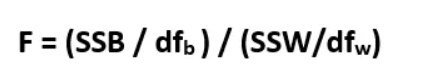
- [ANOVA for Feature Selection in Machine Learning - Explanation](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476)

In [44]:
SelectKBest_using_model(f_classif, "ANOVA F-value Scores Ranks")

                                 Variables        Scores Ranks   P-value
0                                   Gender     12.553357    21  0.000396
1                                      Age   1546.214694    17       0.0
2                            Customer Type   3189.593178    15       0.0
3                           Type of Travel  23148.903889     2       0.0
4                                    Class   22780.94802     3       0.0
5                          Flight Distance    6235.46228    10       0.0
6                          Departure Delay    365.792471    19       0.0
7                            Arrival Delay    820.630973    18       0.0
8   Departure and Arrival Time Convenience    281.008702    20       0.0
9                   Ease of Online Booking   2641.607851    16       0.0
10                        Check-in Service   5472.673565    13       0.0
11                         Online Boarding  30621.479375     1       0.0
12                           Gate Location       1.

### Mutual Information
* Mutual Information formula, I(X|Y) = H(X) - H(X|Y)
* If X and Y are independent, it means that I(X|Y) = 0
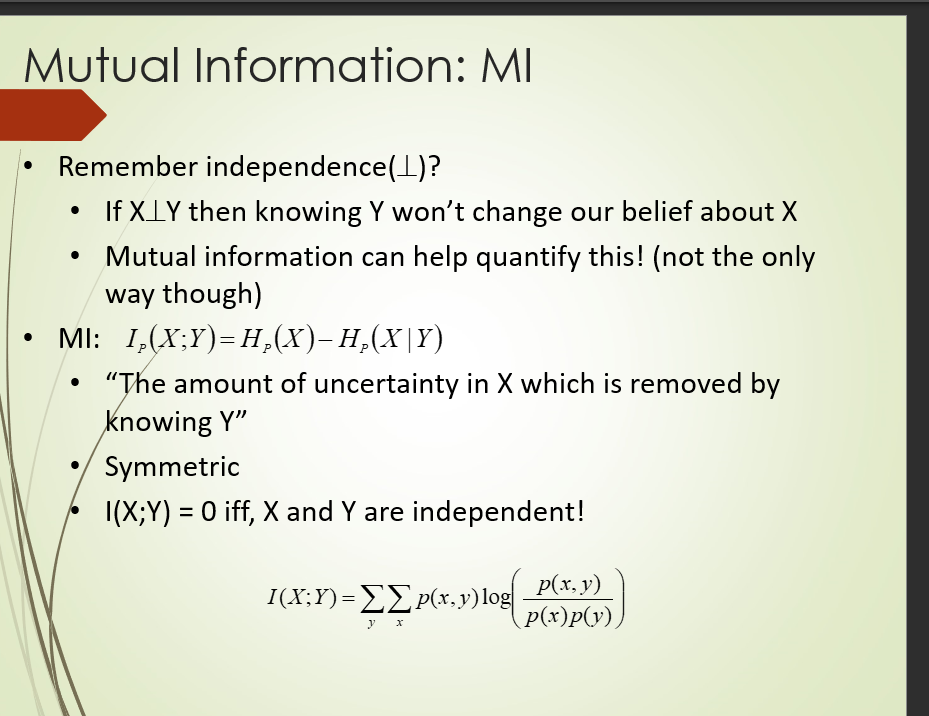

In [45]:
SelectKBest_using_model(mutual_info_classif, "Mutual Information Ranks", contain_p_values=False)

                                 Variables    Scores Ranks
0                                   Gender   0.00488    20
1                                      Age  0.044058    14
2                            Customer Type  0.024303    17
3                           Type of Travel  0.117498     4
4                                    Class  0.134477     3
5                          Flight Distance  0.060674     8
6                          Departure Delay  0.005181    19
7                            Arrival Delay  0.003574    21
8   Departure and Arrival Time Convenience   0.00246    22
9                   Ease of Online Booking  0.051575    11
10                        Check-in Service  0.033087    15
11                         Online Boarding  0.212815     1
12                           Gate Location  0.012265    18
13                        On-board Service  0.059108     9
14                            Seat Comfort  0.079158     6
15                        Leg Room Service  0.061549    

## Permutation Important Using ANN 
* Permutation important is a feature selection technique 
* It is done by randomly permuting the data in a column/feature and compute the metrics of actual_y and predicted_y 
* If the metric remains high after randomly permute=ing the data, it means that this column of feature is not that important 

In [46]:
# Reference: https://explained.ai/rf-importance/index.html#4
def permutation_importances(model, X_train, y_train, metric): 
    baseline = metric(model.predict(X_train), y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        
        
        # Repeat the process for 3 times
        average_m    = 0
        for i in range(5):
            X_train[col] = np.random.permutation(X_train[col])  # Random permute the value of selected columns
            m = metric(model.predict(X_train), y_train)         # Get the metric value 
            average_m += m
        average_m /= 5
        
        X_train[col] = save                                 # Restore the value for the columns
        imp.append(baseline - average_m)                    # Save the feature important values
        
    return np.array(imp) # Return Feature Important Values


In [47]:
%%time
accuracy_list = []
model = MLPClassifier(hidden_layer_sizes=(64, 32, 16,), 
                    random_state=1, max_iter=300, 
                    early_stopping = True).fit(X_train, y_train)

# Since the target variable is quite balance, accuracy is a good metric to measure the model performance

feature_important                = permutation_importances(model, X_train, y_train, accuracy_score)
feature_important_argsort        = feature_important.argsort()                      # perform an indirect sort 
ranks                            = np.zeros_like(feature_important_argsort)         # Create empty array with shape = feature_important.shape
ranks[feature_important_argsort] = np.arange(len(feature_important_argsort), 0, -1) # Rank the highest value of the feature as 1, second highest value as 2, ...

ranking_list.append(ranks)
columns_name.append("ANN Ranking")


pd.DataFrame(np.concatenate([df.columns.to_numpy()[None,:-1], feature_important[None,:], ranks[None,:]], axis=0).T, 
             columns=["Variables","Feature Important Values", "Ranks"] )

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\a

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names

C:\Users\ethan\a

CPU times: total: 1min 27s
Wall time: 1min 23s


Variables Feature Important Values Ranks
0                                   Gender                 0.000873    20
1                                      Age                 0.004371    14
2                            Customer Type                 0.084634     3
3                           Type of Travel                 0.164715     2
4                                    Class                 0.049285     5
5                          Flight Distance                 0.000532    22
6                          Departure Delay                 0.000983    19
7                            Arrival Delay                  0.00121    18
8   Departure and Arrival Time Convenience                 0.004316    15
9                   Ease of Online Booking                 0.008535    10
10                        Check-in Service                 0.005566    12
11                         Online Boarding                  0.02246     7
12                           Gate Location                 0.064576     4
13                        On-board Service                 0.003359    16
14                            Seat Comfort                 0.011804     9
15                        Leg Room Service                 0.001865    17
16                             Cleanliness                 0.004694    13
17                          Food and Drink                 0.000735    21
18                       In-flight Service                  0.01801     8
19                  In-flight Wifi Service                 0.214952     1
20                 In-flight Entertainment                 0.008527    11
21                        Baggage Handling                 0.029179     6

In [48]:
y_test_out = model.predict(X_test)
print("For ANN:")
print("The accuracy  on the test data:",accuracy_score(y_test,y_test_out))
print("The precision on the test data:",precision_score(y_test,y_test_out, average="weighted"))
print("The recall    on the test data:",recall_score(y_test,y_test_out, average="weighted"), "\n")

accuracy_list.append(accuracy_score(y_test,y_test_out))

For ANN:
The accuracy  on the test data: 0.9598860486603018
The precision on the test data: 0.9601133351073738
The recall    on the test data: 0.9598860486603018 



## Recursive Feature Elimination
- RFE is a feature selection method that recursively removes small number of features per loop until specified number of features met
- It will rank features by importance and refits the model after some features are discarded and repeats, making it recursive
- In sklearn, RFE() will only works for the estimators that has provide the information about feature important (E.g. feature_importances_, coef_)

In [49]:
def RFE_using_model(model, model_name):
    rfe   = RFE(model, n_features_to_select=1)
    fit   = rfe.fit(X_train, y_train)
    
    # Try to use the fit the model to obtain the accuracy on the test dataset
    model.fit(X_train, y_train)
    y_test_out = model.predict(X_test)
    print(f"For {model_name}:")
    print("The accuracy  on the test data:",accuracy_score(y_test,y_test_out))
    print("The precision on the test data:",precision_score(y_test,y_test_out, average="weighted"))
    print("The recall    on the test data:",recall_score(y_test,y_test_out, average="weighted"), "\n")
    
    ranking_list.append(fit.ranking_)
    columns_name.append(f"{model_name} Ranking")
    accuracy_list.append(accuracy_score(y_test,y_test_out))

### Random Forest in feature selection
- Random Forest is a Supervised machine learning model
- It creates a forest of decision trees, while each decision tree is formed based on randomly extracts the observations and features from the dataset. This means that not every tree will see all observations or see all features.
- From a forest of decision trees, we calculates the importance of a feature based on how it removes impurities
- This essentially means that we can observe the change in accuracy of the decision tree when we include or don't include a feature
- Impurity decrease from each feature can be averaged across trees to see the significance of the feature
- A major advantage of random forest is:
    - robustness
    - able to capture nonlinear relationships between the target and the features

In [50]:
%%time
RFE_using_model(RandomForestClassifier(n_estimators=30, n_jobs=-1), "Random Forest")

For Random Forest:
The accuracy  on the test data: 0.9625038497074222
The precision on the test data: 0.9628344632131048
The recall    on the test data: 0.9625038497074222 

CPU times: total: 38.3 s
Wall time: 6.59 s


### Using Gradient Boosting Classifier
- Boosting is a type of ensemble learning technique that combines several weak models to become a strong model
- Boosting algorithm will build a sequences of n model ($M_{1}$, $M_{2}$, ... , $M_{n}$) such that $M_{i+1}$ will always use to rectify the errors present in $M_{i}$ for i in [1,n]
- Essentially, the model will learn the mistakes from the previous model to become a better model
- Gradient Boosting Classifier is a __classifier__ that use __boosting__ algorithm and it is trained to minimize the loss function of its predecessor using by using the __gradient__ descent
- Per iteration, the gradient of the loss function of the current model will be given to a new weak model. The new weak model will then minimize this gradient
- Typically, we uses decision trees as our weak model. Each new decision tree focuses on data points that were not well predicted by the previous models.
- [Gradient Boosting Algorithm: A Complete Guide for Beginners
](https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/)

In [51]:
%%time
RFE_using_model(GradientBoostingClassifier(), "Gradient Boosting Classifier")

For Gradient Boosting Classifier:
The accuracy  on the test data: 0.942331382814906
The precision on the test data: 0.942368433277863
The recall    on the test data: 0.942331382814906 

CPU times: total: 36.9 s
Wall time: 1min 54s


### Using logistic regression
* It is just a linear regression follow by a function to make the output become probability distribution (like softmax), then, the class with the maximum probability will be the output.


In [52]:
%%time
RFE_using_model(LogisticRegression(solver = "liblinear"), "Logistic Regression")

For Logistic Regression:
The accuracy  on the test data: 0.8736269376860691
The precision on the test data: 0.873461028682732
The recall    on the test data: 0.8736269376860691 

CPU times: total: 1.2 s
Wall time: 4.21 s


### Using Linear Support Vector Classification
- Linear Support Vector Classification is supervised machine learning algorithm which perform classification by creating an lines/boundaries/hyperplane that best separates the classes with maximum margin between hyperplane and the data points

In [53]:
%%time
RFE_using_model(LinearSVC(max_iter=5000), "Linear Support Vector Classification")

For Linear Support Vector Classification:
The accuracy  on the test data: 0.8733189610922903
The precision on the test data: 0.8731958383751387
The recall    on the test data: 0.8733189610922903 

CPU times: total: 13.1 s
Wall time: 45.5 s


## Summary on feature selection

In [54]:
"""
   Average ranking except for the ANOVA F-value and Mutual Information as there are 
   not model that select feature based on the model accuracy  
"""
average_ranking                  = np.average(np.array(ranking_list[2:]), axis=0, weights=np.exp(accuracy_list))
average_ranking_argsort          = np.array(average_ranking).argsort()
ranking                          = np.zeros_like(average_ranking_argsort)
ranking[average_ranking_argsort] = np.arange(1, len(ranking)+1)

ranking_list.extend([average_ranking, ranking])
columns_name.extend(["Average_ranking from ANN to Linear SVC", "Average_ranking from ANN to Linear SVC (int)"])

In [55]:
df1 = pd.DataFrame(np.concatenate((df.columns.to_numpy()[None,:-1], ranking_list), axis=0).T, 
                   columns=columns_name)
df1

Variables ANOVA F-value Scores Ranks  \
0                                   Gender                       21.0   
1                                      Age                       17.0   
2                            Customer Type                       15.0   
3                           Type of Travel                        2.0   
4                                    Class                        3.0   
5                          Flight Distance                       10.0   
6                          Departure Delay                       19.0   
7                            Arrival Delay                       18.0   
8   Departure and Arrival Time Convenience                       20.0   
9                   Ease of Online Booking                       16.0   
10                        Check-in Service                       13.0   
11                         Online Boarding                        1.0   
12                           Gate Location                       22.0   
13                        On-board Service                        6.0   
14                            Seat Comfort                        5.0   
15                        Leg Room Service                        7.0   
16                             Cleanliness                        8.0   
17                          Food and Drink                       14.0   
18                       In-flight Service                       12.0   
19                  In-flight Wifi Service                        9.0   
20                 In-flight Entertainment                        4.0   
21                        Baggage Handling                       11.0   

   Mutual Information Ranks ANN Ranking Random Forest Ranking  \
0                      20.0        20.0                  22.0   
1                      14.0        14.0                   6.0   
2                      17.0         3.0                  12.0   
3                       4.0         2.0                   7.0   
4                       3.0         5.0                   4.0   
5                       8.0        22.0                   2.0   
6                      19.0        19.0                  20.0   
7                      21.0        18.0                  19.0   
8                      22.0        15.0                  18.0   
9                      11.0        10.0                   9.0   
10                     15.0        12.0                  13.0   
11                      1.0         7.0                   1.0   
12                     18.0         4.0                  17.0   
13                      9.0        16.0                  11.0   
14                      6.0         9.0                  10.0   
15                      7.0        17.0                   8.0   
16                     10.0        13.0                  16.0   
17                     16.0        21.0                  21.0   
18                     13.0         8.0                  15.0   
19                      2.0         1.0                   3.0   
20                      5.0        11.0                   5.0   
21                     12.0         6.0                  14.0   

   Gradient Boosting Classifier Ranking Logistic Regression Ranking  \
0                                  22.0                        22.0   
1                                  14.0                        13.0   
2                                   6.0                         4.0   
3                                   3.0                         3.0   
4                                   4.0                        10.0   
5                                  21.0                        17.0   
6                                  20.0                        19.0   
7                                  16.0                        12.0   
8                                  17.0                        14.0   
9                                  18.0                         9.0   
10                                  8.0                         5.0   
11   

In [56]:
variables_name = df1["Variables"].to_numpy()
print("Variables with ranking and average ranking > 15:")
print(variables_name[ranking > 15],"\n")
print(variables_name[average_ranking > 15],"\n")
# print(variables_name[average_ranking > 14], "\n")

print("Variables with 10 <= ranking <=15")
print(variables_name[np.logical_and(10 <= ranking, ranking <= 15)], "\n")

print("Variables with ranking < 10 ")
print(variables_name[ranking < 10])

Variables with ranking and average ranking > 15:
['Gender' 'Flight Distance' 'Departure Delay' 'Arrival Delay'
 'Departure and Arrival Time Convenience' 'Gate Location' 'Food and Drink'] 

['Gender' 'Flight Distance' 'Departure Delay' 'Arrival Delay'
 'Departure and Arrival Time Convenience' 'Gate Location' 'Food and Drink'] 

Variables with 10 <= ranking <=15
['Age' 'Ease of Online Booking' 'Seat Comfort' 'In-flight Service'
 'In-flight Entertainment' 'Baggage Handling'] 

Variables with ranking < 10 
['Customer Type' 'Type of Travel' 'Class' 'Check-in Service'
 'Online Boarding' 'On-board Service' 'Leg Room Service' 'Cleanliness'
 'In-flight Wifi Service']


## Intepretation of performances of the model
* Overally, the test accuracy, recall & precision of Random Forest > ANN > Gradient Boosting Classifier > Logistic Regression > Linear Support Vector Classification.
* Therefore, we will more trust the model's ranking with the better performance on the test dataset and we will use exponential function to weighted the model with higher accuracy slightly more

## Intepretation of Feature Selection Section
* From the table above, 
 - In terms of flight services, the variable that contributes the most in predicting the satisfaction is __Online Boarding__ (rank $1^{st}$), followed by Type of Travel, In-flight Wifi Service, ...
 - The variable in flight services that contributes the least in predicting satisfaction is __Food and Drink__ (rank $20^{th}$)
<br><br>
* Decision:
 - 7 features that have average_ranking > 15 will be dropped before performing factor analysis ['Gender' 'Flight Distance' 'Departure Delay' 'Arrival Delay' 'Departure and Arrival Time Convenience' 'Gate Location' 'Food and Drink']
 - Among them, 
   - __(1)__ variables are from customer's personal information (Gender)
   - __(1)__ variables is from Flight type (Flight distance)
   - __(3)__ variables is from whether the flight punctual or not (departure delay, arrival delay, departure and arrival time convenience)
   - __(1)__ variables is from In-flight services (Food and Drink)
   - __(1)__ variables is from miscellaneous (Gate Location)

 - The reason of why Seat Comfort (ranking $15^{th}$ is not drop):
   - Variables with 10 <= ranking <=15 are ['Age' 'Ease of Online Booking' 'Seat Comfort' 'Cleanliness'
 'In-flight Service' 'Baggage Handling'] 
   - They are all variables related to flight services provided except Age (ranking $13^{th}$). 
   - It seem that they will contribute in forming the factors
   - The possible reasons as to why these 7 features ['Gender' 'Flight Distance' 'Departure Delay' 'Arrival Delay'
 'Departure and Arrival Time Convenience' 'Gate Location' 'Food and Drink']  does not contribute much in predicting the satisfaction of customers are as below:
|No|Variables|Possible Reason|
|:-:|:-:|:-:|
|1|Gender|Typically, the gender will not affect the results since it's not related to the features of the flight or the service provided. This means that the satisfaction will not be affected|
|2|Flight Distance|Most people booking the flight should already know the distance and travel time of their journey, so this shouldn't affect the satifsfaction of the passengers. This feature is also not really related to the service provided by the airline |
|3|Departure Delay|The departure delay doesn't really affect the satisfaction because quite often, it is not the airlines' fault that a flight has been delayed. This issue is usually due to high traffic in the airport, with many planes wanting to take off from the same airport and using the same route. When it's related to the airline, like a component of the airplane malfunctioning, it is very rare and often doesn't happen. |
|4|Arrival Delay| This is related to departure delay. If there is a departure delay, there will definitely be an arrival delay. However, as stated above, it is typically not the airlines' fault, so it doesn't affect the customer's satisfaction with the airline |
|5|Departure and Arrival Time Convenience|The passenger is the one who books the flights, so they are the ones selecting their departure and arrival time. The airline does give options for different times with different prices, but is ultimately up to the customer as to whether they want a more convenient time for a higher price or a less convenient time with a lower price|
|6|Gate Location|Whether the customer enter at which gate location, it will not affect the customer's satisfaction on the flight-services unless there is something wrong at the gate location|
|7|Food and Drink|There are 2 aspects when it comes to the food and drinks, which are quality and the price of the food. In terms of quality, customers usually don't expect much from airline food as it is all prepackaged and typically there is nothing unique about the food being served. In terms of price, there is food often served for free, especially packaged snacks. On long flights, airlines will usually provide a meal for every customer inclusive of their ticket price, so customers' satisfcation of food in terms of price should not be affected. Essentially, customers typically do not expect very much from the food and is not considered an important feature in terms of satisfaction as they might be more focussed on the other services provided|

<br><br>
* Some contradiction with the hypothesis:
|No|From the hypothesis, logically, we should drop these 10 variables |From the analysis from feature selection, should we drop it ?|
|:-:|:-:|:-:|
|1|gender|Yes|
|2|age|No|
|3|customer type|No|
|4|type of travel|No|
|5|class|No|
|6|flight distance|Yes|
|7|departure delay|Yes|
|8|arrival delay|Yes|
|9|departure and arrival time convenience|Yes|
|10|gate location|Yes|

 - The possible reason of why these 4 features ['Age','Customer Type' 'Type of Travel' 'Class' 'Arrival Delay']  contribute much in predicting satisfaction of customer is as below:
|No|Variables|Possible Reason|
|:-:|:-:|:-:|
|1|Age|It ranges from 7 to 85 years old. Different age groups have different percentages of satisfaction. For example, when the customer is about 40 years old, most of them will be satisfied with the airline services. (This can be shown in the histogram plot at below) |
|2|customer type|It can be (First-time/Returning). If the customer is returning to the same airline for their travels, it means that the airline is doing a good job in attracting the customers to use their airlines instead of competitors|
|3|type of travel|It can be (Business/Personal) As we have mentioned above, business trips are typicaly paid for. Therefore, this means that customers on business trips get to enjoy the benefits for free. On the contrary, personal trip customers have high expectations as they have paid for the service and want to get their money's worth|
|4|class|It can be (Business/Economy/Economy Plus) For each class, there is a different level of service and experience. The service in Economy tends to be the worst as airlines place no priority on these passengers. On the contrary, passengers in business will get the best service as they have paid a high amount of money. Therefore, the better the service, the more satisfied a customer will be, and the service is dependent on which class the passenger is in|

* Decision:
 - However, we will drop the 'age','customer type' and 'type of travel' as it is not helping in improving the airline services. For variables 'class', we will not drop it as it as it seem to be related to the flight services (as difference class will has difference distribution of satisfaction). For example, when the class="Business", overall, the people will satisfied (This can be shown at the bivariate bar plot)

<Axes: xlabel='Age', ylabel='Count'>

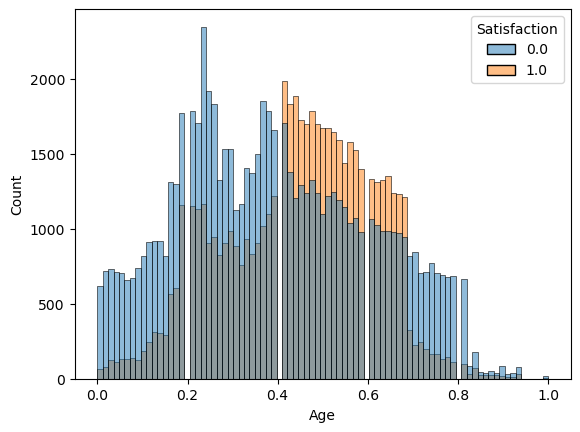

In [57]:
sns.histplot(data=df, x="Age", hue="Satisfaction")

## Remove some features before factor analysis

In [58]:
R_14 = ranking <= 15
R_14   # As we also want to remove customer type and type of travel, so we will set index 2 and 3 as False

array([False,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True])

In [59]:
R_14[1] = False
R_14[2] = False
R_14[3] = False
R_14

array([False, False, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True])

In [60]:
X_train = X_train.to_numpy()[:,R_14]
X_test  = X_test.to_numpy()[:,R_14]

variable_selected = variables_name[R_14]
print("The variable selected:", variable_selected)

The variable selected: ['Class' 'Ease of Online Booking' 'Check-in Service' 'Online Boarding'
 'On-board Service' 'Seat Comfort' 'Leg Room Service' 'Cleanliness'
 'In-flight Service' 'In-flight Wifi Service' 'In-flight Entertainment'
 'Baggage Handling']


In [61]:
# Test the performances on the test dataset after dropping some of the features
model = RandomForestClassifier(n_estimators=30, n_jobs=-1)
model.fit(X_train, y_train)
y_test_out = model.predict(X_test)
print("The accuracy  on the test data:",accuracy_score(y_test,y_test_out))
print("The precision on the test data:",precision_score(y_test,y_test_out, average="weighted"))
print("The recall    on the test data:",recall_score(y_test,y_test_out, average="weighted"), "\n")

The accuracy  on the test data: 0.9417410943434965
The precision on the test data: 0.9417486468345992
The recall    on the test data: 0.9417410943434965 



# Exploratory Factor Analysis (EFA)

In [62]:
kmo_all, kmo_model = calculate_kmo(X_train)
print('KMO Model Score:', kmo_model)

KMO Model Score: 0.7480765335877007


C:\Users\ethan\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



In [63]:
chi_square, p_value = calculate_bartlett_sphericity(X_train)
print("Bartlett's test of sphericity:")
print("   P-value: ", p_value) #should be less than 0.05 (as close to 0)

Bartlett's test of sphericity:
   P-value:  0.0


* Since the KMO score > 0.5 and P-value of bartlett test is < 0.01 (significant value), we can apply EFA

In [64]:
corr = np.corrcoef(X_train, rowvar=False)

In [65]:
#Factor Analysis
n_factors = X_train.shape[1]
fa = FactorAnalyzer(n_factors, rotation=None, is_corr_matrix=True)
fa.fit(corr)

FactorAnalyzer(is_corr_matrix=True, n_factors=12, rotation=None,
               rotation_kwargs={})

In [66]:
#Kaiser-Guttman rule
#contains the indices where the eigenvalues of the correlation matrix
eigenvalue, factor_eigenvalue = fa.get_eigenvalues()
idx = np.where(eigenvalue>1)[0]

#recommended number of factors to retain based on the Kaiser-Guttman rule
n_factors_kg = idx.size
print(f"Number of factors (Kaiser-Guttman rule): {n_factors_kg}")

Number of factors (Kaiser-Guttman rule): 4


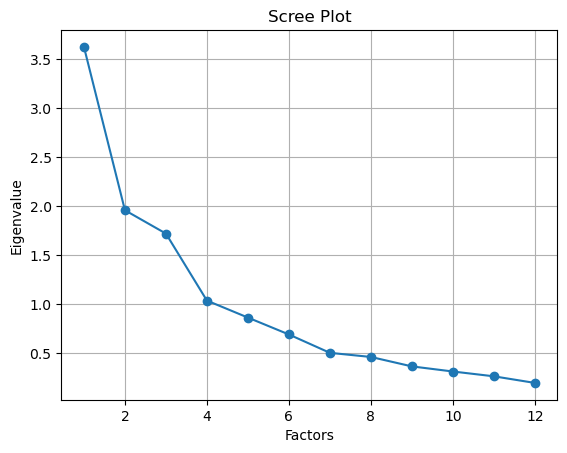

In [67]:
#Scree plot
plt.plot(range(1,n_factors+1), eigenvalue, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [68]:
orthorgonal = ORTHOGONAL_ROTATIONS
oblique     = OBLIQUE_ROTATIONS
print("The orthogonal rotations are ",orthorgonal)
print("The oblique rotations are ", oblique)

The orthorgonal rotations are  ['varimax', 'oblimax', 'quartimax', 'equamax', 'geomin_ort']
The oblique rotations are  ['promax', 'oblimin', 'quartimin', 'geomin_obl']


In [69]:
def loadings_by_rotations(X, rotationtype: str="orthogonal"):
    rotations = {"orthogonal": ORTHOGONAL_ROTATIONS, "oblique": OBLIQUE_ROTATIONS}
    k         = n_factors_kg
    df_       = {"factor":[f for f in range(k)]}
    
    for r in rotations[rotationtype]:   # For each rotation type
        df_[r] = [[] for _ in range(k)]
        fa = FactorAnalyzer(n_factors=k, rotation=r)
        fa.fit(X)                                     # Since is_corr_matrix=False, we can direcly fit(X)
        idx_max = np.argmax(fa.loadings_, axis=1)     # Get the index with maximum factor loading for each row
        
        list(map(lambda idx_max, variable: df_[r][idx_max].append(variable), 
            idx_max, variable_selected))               # Append each variable to its corresponding factor
        
    show_df(pd.DataFrame(df_).set_index("factor"))    # Display the dataframe  

In [70]:
loadings_by_rotations(X_train)
loadings_by_rotations(X_train, 'oblique')

## Interpretation of EFA:
* Based on the final results, it is evident that different rotation techniques yield varying factor loadings.
* The varimax, quartimax, equamax, geomin_ort (orthogonal rotation), and promax rotation (oblique rotation) techniques produce similar factors. When the factors produced by oblique rotation resemble those produced by orthogonal rotation, it indicates that the factors are nearly orthogonal/uncorrelated.
* Similarly, the oblimin and quartimin techniques yield similar factors.
* Moreover, the oblimax and geomin_obl techniques yield distinct results.
* The table below displays the factor naming conventions for each rotation technique.

|Factor|varimax or promax or geomin_ort|quartimax or equamax|oblimax|oblimin or quartimin|geomin_obl|
|:-:|:--|:--|:--|:--|:--|
|0|Overall service quality|Comfort and Entertainment|Overall Service quality|Overall service quality|Overall service quality|
|1|Comfort and Entertainment|Overall Service quality|Technology services|Comfort and Entertainment|Connectivity|
|2|Travel Class and Connectivity|Travel Class and Connectivity|-|Travel Class and Connectivity|Comfort and Entertainment|
|3|Check-in and boarding services|Check-in and boarding services|Class|Online Boarding|Check-in and boarding services|

* All possible naming : 
 - {Overall service quality, Comfort and Entertainment, Travel Class and Connectivity, Check-in and boarding services, Technology services, Connectivity} $\cup$ {Class, Online Boarding} - Original variable name 
 
 
|Factor|Possible feature that in the factor|
|:--|:--|
|Overall service quality|Power Outlets and USB Ports, ...|
|Comfort and Entertainment|Cabin Air Quality, Cabin Layout and Design, Audio Options, ...|
|Travel Class and Connectivity|Mood Lighting, Real-Time Flight Tracking, ...|
|Check-in and boarding services|Online Check-in services, Offline check-in services, Automated Boarding Gates services, ...|
|Technology services|Seat Controls, Electronic Amenities, ... |
|Connectivity|Real-Time Flight Tracking, ...|

* By identifying the features associated with each factor, airlines can enhance customer satisfaction by improving those features.

## Random Forest on transformed dataset
* This section focuses on building a model using the transformed dataset (i.e., data after rotation) and evaluating its performance on a test dataset. This analysis helps us assess how well each rotation technique captures the variances in the features.
* Since oblique rotation maximizes the factor loadings without assuming orthogonality between factors, data transformed using oblique rotation is expected to achieve higher accuracy in the model and capture more variance in the features.
* Moreover, as Random Forest demonstrated the highest performance in the feature selection section, we will use Random Forest classification to evaluate the model's performance on the test dataset.

In [71]:
def RF_fa(X_train, X_test, y_train, y_test, rotationtype):
    k = n_factors_kg
    test_accuracies = []
    for r in rotationtype:
        fa         = FactorAnalyzer(n_factors=k, rotation=r)
        X_train_fa = fa.fit_transform(X_train)
        X_test_fa  = fa.transform(X_test)
        
        model = RandomForestClassifier(n_estimators=30, random_state=100, n_jobs=-1)
        model.fit(X_train_fa, y_train)
        y_hat    = model.predict(X_test_fa)
        test_acc = accuracy_score(y_test, y_hat)
        test_accuracies.append(test_acc)
    return pd.DataFrame({"Rotation type": rotationtype, "Test accuracy": test_accuracies})


In [72]:
%%time
orth_results = RF_fa(X_train, X_test, y_train, y_test, ORTHOGONAL_ROTATIONS)
obli_results = RF_fa(X_train, X_test, y_train, y_test, OBLIQUE_ROTATIONS)
pd.concat([orth_results, obli_results])

CPU times: total: 55.3 s
Wall time: 6.42 s


Rotation type  Test accuracy
0       varimax       0.912201
1       oblimax       0.906401
2     quartimax       0.913151
3       equamax       0.913151
4    geomin_ort       0.911867
0        promax       0.915383
1       oblimin       0.916179
2     quartimin       0.916179
3    geomin_obl       0.915691

In [73]:
px.line(pd.concat([orth_results,obli_results]), x='Rotation type', y='Test accuracy', markers=True)

* From the evaluation graph shown above, we can observe that the results from each rotation has roughly 91% accuracy on test dataset (Originally, before transformed, the data performance at test dataset is about 94%)
* This imply that each rotation managed to perform well in capturing the variance in each features.

## Feature Important of each factor

In [74]:
factor_name = {}
factor_name["varimax"]    = ["Overall service quality", "Comfort and Entertainment", "Travel Class and Connectivity", "Check-in and boarding services"]
factor_name["promax"]     = factor_name["varimax"].copy()
factor_name["geomin_ort"] = factor_name["varimax"].copy()

factor_name["quartimax"]  = ["Comfort and Entertainment", "Overall Service quality", "Travel Class and Connectivity", "Check-in and boarding services"]
factor_name["equamax"]    = factor_name["quartimax"].copy()

factor_name["oblimax"]    = ["Overall Service quality", "Technology services", "-","Class"]

factor_name["oblimin"]    = ["Overall service quality", "Comfort and Entertainment", "Travel Class and Connectivity", "Online Boarding"]
factor_name["quartimin"]  = factor_name["oblimin"].copy()

factor_name["geomin_obl"] = ["Overall service quality", "Connectivity", "Comfort and Entertainment", "Check-in and boarding services"]

In [75]:
%%time
feature_important_list = []

for rotation in ["varimax", "promax", "geomin_ort", "quartimax", "equamax", "oblimax", "oblimin", "quartimin", "geomin_obl"]:
    
    # Transform the dataset 
    fa         = FactorAnalyzer(n_factors=n_factors_kg, rotation=rotation)
    X_train_fa = fa.fit_transform(X_train)
    
    model = RandomForestClassifier(n_estimators=30,n_jobs=-1)
    model.fit(X_train_fa, y_train)

    feature_important_list.append(model.feature_importances_.tolist())
feature_important_list = np.array(feature_important_list)

CPU times: total: 56.5 s
Wall time: 6.23 s


In [76]:
temp_df = pd.DataFrame(feature_important_list.T, columns=ORTHOGONAL_ROTATIONS + OBLIQUE_ROTATIONS)
temp_df.loc[len(temp_df)] = np.concatenate([orth_results["Test accuracy"].to_numpy(), obli_results["Test accuracy"].to_numpy()])
temp_df.set_index(pd.Index(["Factor 0", "Factor 1", "Factor 2","Factor 3", "Test_accuracy"]))

varimax   oblimax  quartimax   equamax  geomin_ort    promax  \
Factor 0       0.152437  0.124288   0.172034  0.241083    0.239931  0.419528   
Factor 1       0.197007  0.143005   0.175400  0.166495    0.162526  0.225797   
Factor 2       0.356566  0.324508   0.355644  0.355663    0.350776  0.181899   
Factor 3       0.293990  0.408198   0.296922  0.236759    0.246766  0.172776   
Test_accuracy  0.912201  0.906401   0.913151  0.913151    0.911867  0.915383   

                oblimin  quartimin  geomin_obl  
Factor 0       0.163529   0.166789    0.170067  
Factor 1       0.198335   0.219305    0.363036  
Factor 2       0.308499   0.303575    0.155359  
Factor 3       0.329636   0.310331    0.311539  
Test_accuracy  0.916179   0.916179    0.915691

The table above displays the distribution of feature (factor) scores for each rotation. By sorting the scores for each rotation, we can determine the order in which to prioritize improvements for each factor.

In [77]:
ordered_factors_df = dict()
for rotation in ORTHOGONAL_ROTATIONS + OBLIQUE_ROTATIONS:
    temp = zip(enumerate(factor_name[rotation]), temp_df.iloc[:-1,:][rotation].values)
    ordered_factors_df[rotation] = [f"{i[0]}: {i[1]}" for i, _ in sorted(temp, key=lambda x: x[1], reverse=True)]
    
ordered_factors_df = pd.DataFrame(ordered_factors_df)
ordered_factors_df.loc[len(ordered_factors_df)] = np.concatenate([orth_results["Test accuracy"].to_numpy(), 
                                                                  obli_results["Test accuracy"].to_numpy()])
ordered_factors_df.set_index(pd.Index(
    ["First priority", "Second priority", "Third priority", "Fourth priority", "Test accuray"]))

varimax  \
First priority    2: Travel Class and Connectivity   
Second priority  3: Check-in and boarding services   
Third priority        1: Comfort and Entertainment   
Fourth priority         0: Overall service quality   
Test accuray                              0.912201   

                                    oblimax  \
First priority                     3: Class   
Second priority                        2: -   
Third priority       1: Technology services   
Fourth priority  0: Overall Service quality   
Test accuray                       0.906401   

                                         quartimax  \
First priority    2: Travel Class and Connectivity   
Second priority  3: Check-in and boarding services   
Third priority          1: Overall Service quality   
Fourth priority       0: Comfort and Entertainment   
Test accuray                              0.913151   

                                           equamax  \
First priority    2: Travel Class and Connectivity   
Second priority       0: Comfort and Entertainment   
Third priority   3: Check-in and boarding services   
Fourth priority         1: Overall Service quality   
Test accuray                              0.913151   

                                        geomin_ort  \
First priority    2: Travel Class and Connectivity   
Second priority  3: Check-in and boarding services   
Third priority          0: Overall service quality   
Fourth priority       1: Comfort and Entertainment   
Test accuray                              0.911867   

                                            promax  \
First priority          0: Overall service quality   
Second priority       1: Comfort and Entertainment   
Third priority    2: Travel Class and Connectivity   
Fourth priority  3: Check-in and boarding services   
Test accuray                              0.915383   

                                          oblimin  \
First priority                 3: Online Boarding   
Second priority  2: Travel Class and Connectivity   
Third priority       1: Comfort and Entertainment   
Fourth priority        0: Overall service quality   
Test accuray                             0.916179   

                                        quartimin  \
First priority                 3: Online Boarding   
Second priority  2: Travel Class and Connectivity   
Third priority       1: Comfort and Entertainment   
Fourth priority        0: Overall service quality   
Test accuray                             0.916179   

                                        geomin_obl  
First priority                     1: Connectivity  
Second priority  3: Check-in and boarding services  
Third priority          0: Overall service quality  
Fourth priority       2: Comfort and Entertainment  
Test accuray                              0.915691

* After analyzing the table above, it is recommended that the airline service team concentrates on factor 2 (Travel Class and Connectivity). It should be given the highest priority when determining which factor to focus on for improvement of customers' satisfaction
* This is due to the fact that factor 2 has the highest score and highest majority vote in the first priority 
* Consequently, the factor that have the 2nd priority for improvement is the Check-in and boarding services and so on.

<p style="background-color:#349999;color:black;font-size:35px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.5cm">✈️END✈️
<span style='font-size:35px;'></p></span>